In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.impute import KNNImputer
from sklearn.model_selection import GridSearchCV, ShuffleSplit

import warnings
warnings.filterwarnings(action = 'ignore')

In [99]:
df = pd.read_csv('../Data/Algerian_forest_fires_dataset.csv')

In [100]:
df.head()

day month  year Temperature  RH  Ws Rain   FFMC  DMC    DC  ISI  BUI  FWI  \
0   1     6  2012          29  57  18     0  65.7  3.4   7.6  1.3  3.4  0.5   
1   2     6  2012          29  61  13   1.3  64.4  4.1   7.6    1  3.9  0.4   
2   3     6  2012          26  82  22  13.1  47.1  2.5   7.1  0.3  2.7  0.1   
3   4     6  2012          25  89  13   2.5  28.6  1.3   6.9    0  1.7    0   
4   5     6  2012          27  77  16     0  64.8    3  14.2  1.2  3.9  0.5   

     Classes    
0  not fire     
1  not fire     
2  not fire     
3  not fire     
4  not fire

In [101]:
df.tail()

day month  year Temperature  RH  Ws Rain   FFMC  DMC    DC  ISI   BUI  \
242  26     9  2012          30  65  14     0  85.4   16  44.5  4.5  16.9   
243  27     9  2012          28  87  15   4.4  41.1  6.5     8  0.1   6.2   
244  28     9  2012          27  87  29   0.5  45.9  3.5   7.9  0.4   3.4   
245  29     9  2012          24  54  18   0.1  79.7  4.3  15.2  1.7   5.1   
246  30     9  2012          24  64  15   0.2  67.3  3.8  16.5  1.2   4.8   

     FWI     Classes    
242  6.5       fire     
243    0   not fire     
244  0.2   not fire     
245  0.7   not fire     
246  0.5  not fire

In [102]:
df.shape

(247, 14)

This dataset has 247 rows and 14 columns.

In [103]:
print(df.columns)
df.columns = df.columns.str.strip()

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  '],
      dtype='object')


In [104]:
col = list(df.columns)
num_col = list(df._get_numeric_data().columns)
cat_col = list(set(col) - set(num_col))

print("All features : ")
print(col)
print("Numerical features : ")
print(num_col)
print("Categorical features : ")
print(cat_col)

All features : 
['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes']
Numerical features : 
[]
Categorical features : 
['month', 'year', 'day', 'DMC', 'RH', 'Ws', 'FFMC', 'BUI', 'Classes', 'DC', 'Rain', 'FWI', 'Temperature', 'ISI']


All the features are identified as object .

In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4   RH           245 non-null    object
 5   Ws           245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.1+ KB


In [106]:
df1 = df.copy()

# Data cleaning.

In [107]:
df1.duplicated().sum()

0

There are no duplicate values in that dataset.

In [108]:
df1.isnull().sum()

day            1
month          2
year           2
Temperature    2
RH             2
Ws             2
Rain           2
FFMC           2
DMC            2
DC             2
ISI            2
BUI            2
FWI            2
Classes        3
dtype: int64

This dataset has sum null values.

In [109]:
df1[df1.isnull().any(axis =1)]

day month  year Temperature   RH   Ws Rain  \
122                            NaN   NaN   NaN         NaN  NaN  NaN  NaN   
123  Sidi-Bel Abbes Region Dataset   NaN   NaN         NaN  NaN  NaN  NaN   
168                             14     7  2012          37   37   18  0.2   

     FFMC   DMC      DC   ISI   BUI      FWI Classes  
122   NaN   NaN     NaN   NaN   NaN      NaN     NaN  
123   NaN   NaN     NaN   NaN   NaN      NaN     NaN  
168  88.9  12.9  14.6 9  12.5  10.4  fire        NaN

In [110]:
df1.drop(index = [122, 123, 168], inplace = True, axis = 0)
df1[df1.isnull().any(axis =1)]

Empty DataFrame
Columns: [day, month, year, Temperature, RH, Ws, Rain, FFMC, DMC, DC, ISI, BUI, FWI, Classes]
Index: []

In [111]:
df1.isna().sum()

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
dtype: int64

Now it doesn't contain any null values.

In [112]:
df1.dtypes

day            object
month          object
year           object
Temperature    object
RH             object
Ws             object
Rain           object
FFMC           object
DMC            object
DC             object
ISI            object
BUI            object
FWI            object
Classes        object
dtype: object

In [113]:
df1['day'].unique()

array(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23',
       '24', '25', '26', '27', '28', '29', '30', '31', 'day'],
      dtype=object)

In [114]:
df1[df1['day'] == 'day']

day  month  year  Temperature   RH   Ws   Rain  FFMC  DMC  DC  ISI  BUI  \
124  day  month  year  Temperature   RH   Ws  Rain   FFMC  DMC  DC  ISI  BUI   

     FWI    Classes  
124  FWI  Classes

In [115]:
df1.drop(index = 124, axis = 0, inplace = True)

In [116]:
df1[df1['day'] == 'day']

Empty DataFrame
Columns: [day, month, year, Temperature, RH, Ws, Rain, FFMC, DMC, DC, ISI, BUI, FWI, Classes]
Index: []

In [117]:
for i in cat_col:
    if i != 'Classes':
        df1[i] = df1[i].astype(float)

In [118]:
df1.dtypes

day            float64
month          float64
year           float64
Temperature    float64
RH             float64
Ws             float64
Rain           float64
FFMC           float64
DMC            float64
DC             float64
ISI            float64
BUI            float64
FWI            float64
Classes         object
dtype: object

In [119]:
for i in col:
    print(i ,"Column..")
    print(np.sort(df1[i].unique()))
    print('\n')

day Column..
[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.
 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31.]


month Column..
[6. 7. 8. 9.]


year Column..
[2012.]


Temperature Column..
[22. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35. 36. 37. 38. 39. 40.
 42.]


RH Column..
[21. 24. 26. 29. 31. 33. 34. 35. 36. 37. 38. 39. 40. 41. 42. 43. 44. 45.
 46. 47. 48. 49. 50. 51. 52. 53. 54. 55. 56. 57. 58. 59. 60. 61. 62. 63.
 64. 65. 66. 67. 68. 69. 70. 71. 72. 73. 74. 75. 76. 77. 78. 79. 80. 81.
 82. 83. 84. 86. 87. 88. 89. 90.]


Ws Column..
[ 6.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18. 19. 20. 21. 22. 26. 29.]


Rain Column..
[ 0.   0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  1.   1.1  1.2  1.3
  1.4  1.7  1.8  1.9  2.   2.2  2.5  2.9  3.1  3.8  4.   4.1  4.4  4.5
  4.6  4.7  5.8  6.   6.5  7.2  8.3  8.7 10.1 13.1 16.8]


FFMC Column..
[28.6 30.5 36.1 37.3 37.9 40.9 41.1 42.6 44.9 45.  45.9 46.  47.1 47.4
 48.6 48.7 49.4 50.  52.5 52.9 53.4 55.7 56.1 

In [120]:
for i in col:
    df1['Classes'] = df1['Classes'].str.strip()

In [121]:
for i in col:
    print(i ,"Column..")
    print(np.sort(df1[i].unique()))
    print('\n')

day Column..
[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.
 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31.]


month Column..
[6. 7. 8. 9.]


year Column..
[2012.]


Temperature Column..
[22. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35. 36. 37. 38. 39. 40.
 42.]


RH Column..
[21. 24. 26. 29. 31. 33. 34. 35. 36. 37. 38. 39. 40. 41. 42. 43. 44. 45.
 46. 47. 48. 49. 50. 51. 52. 53. 54. 55. 56. 57. 58. 59. 60. 61. 62. 63.
 64. 65. 66. 67. 68. 69. 70. 71. 72. 73. 74. 75. 76. 77. 78. 79. 80. 81.
 82. 83. 84. 86. 87. 88. 89. 90.]


Ws Column..
[ 6.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18. 19. 20. 21. 22. 26. 29.]


Rain Column..
[ 0.   0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  1.   1.1  1.2  1.3
  1.4  1.7  1.8  1.9  2.   2.2  2.5  2.9  3.1  3.8  4.   4.1  4.4  4.5
  4.6  4.7  5.8  6.   6.5  7.2  8.3  8.7 10.1 13.1 16.8]


FFMC Column..
[28.6 30.5 36.1 37.3 37.9 40.9 41.1 42.6 44.9 45.  45.9 46.  47.1 47.4
 48.6 48.7 49.4 50.  52.5 52.9 53.4 55.7 56.1 

In [122]:
df1.drop(columns = 'year', axis = 1, inplace = True)

In [123]:
col = list(df1.columns)
num_col = list(df1._get_numeric_data().columns)
cat_col = list(set(col) - set(num_col))

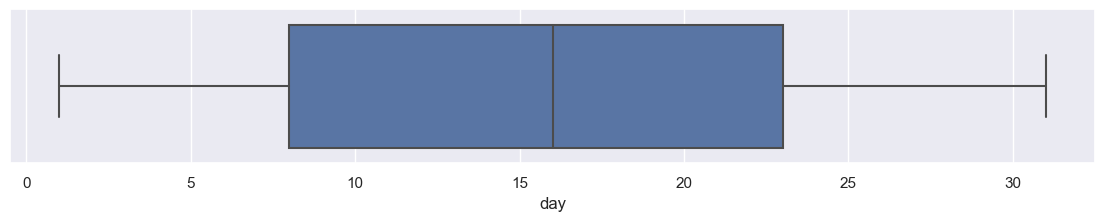

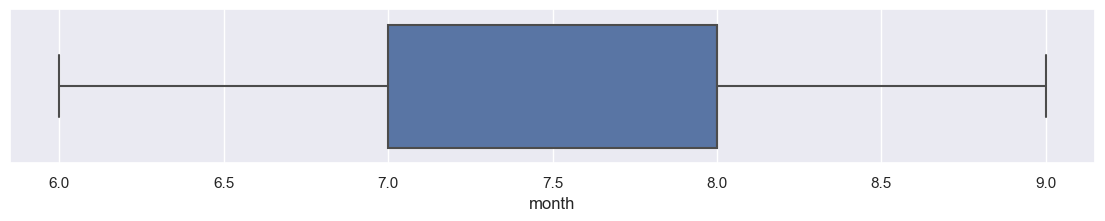

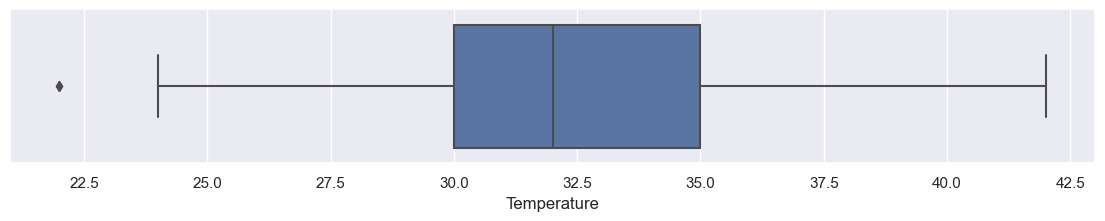

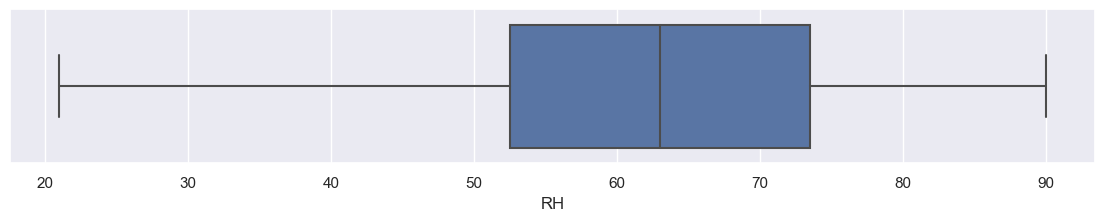

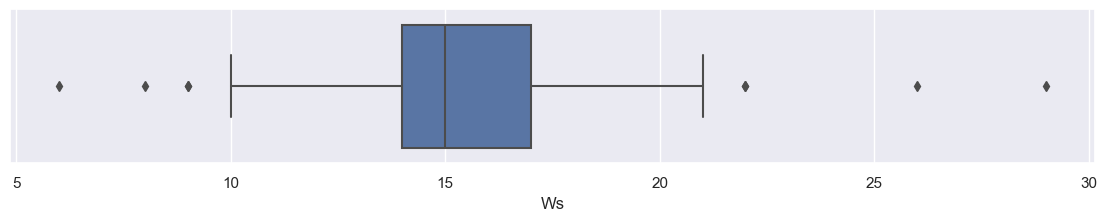

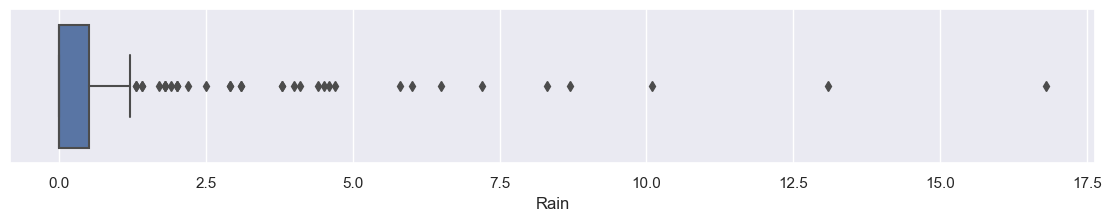

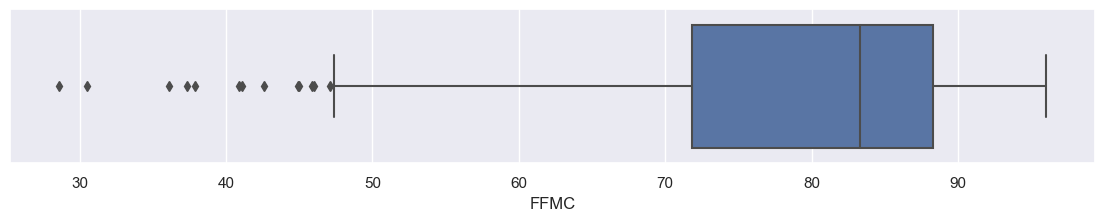

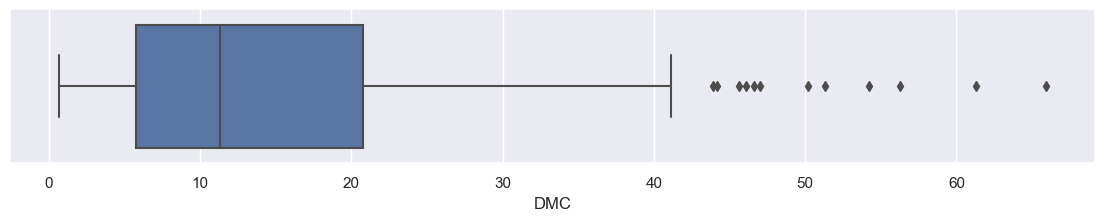

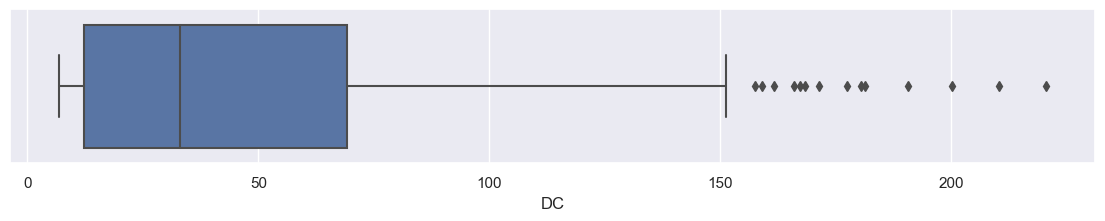

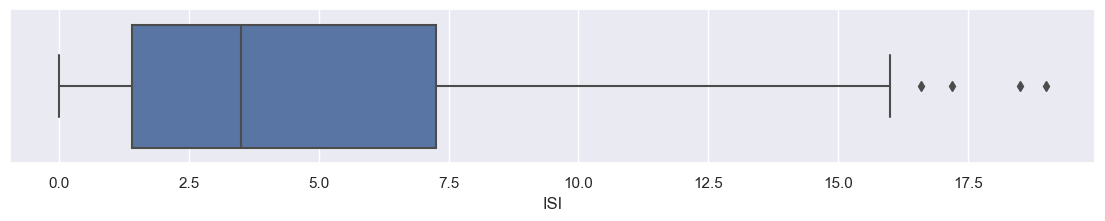

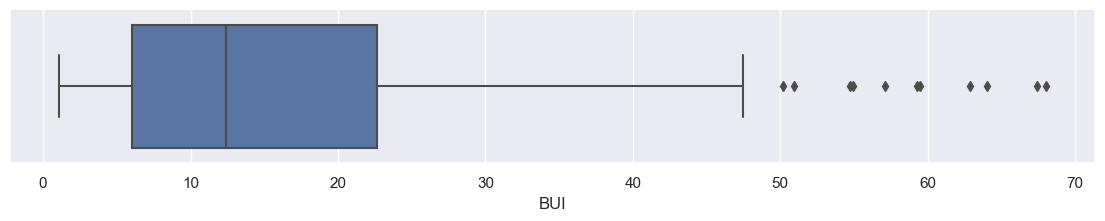

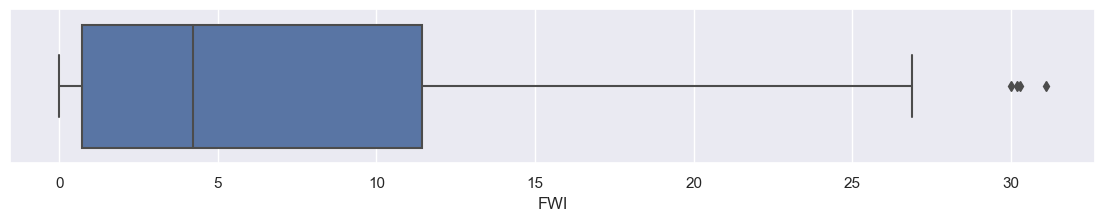

In [124]:
for i in num_col:
    sns.set()
    plt.figure(figsize = (14, 2))
    sns.boxplot(x = i, data = df1)
    plt.show()

<Figure size 3000x3000 with 0 Axes>

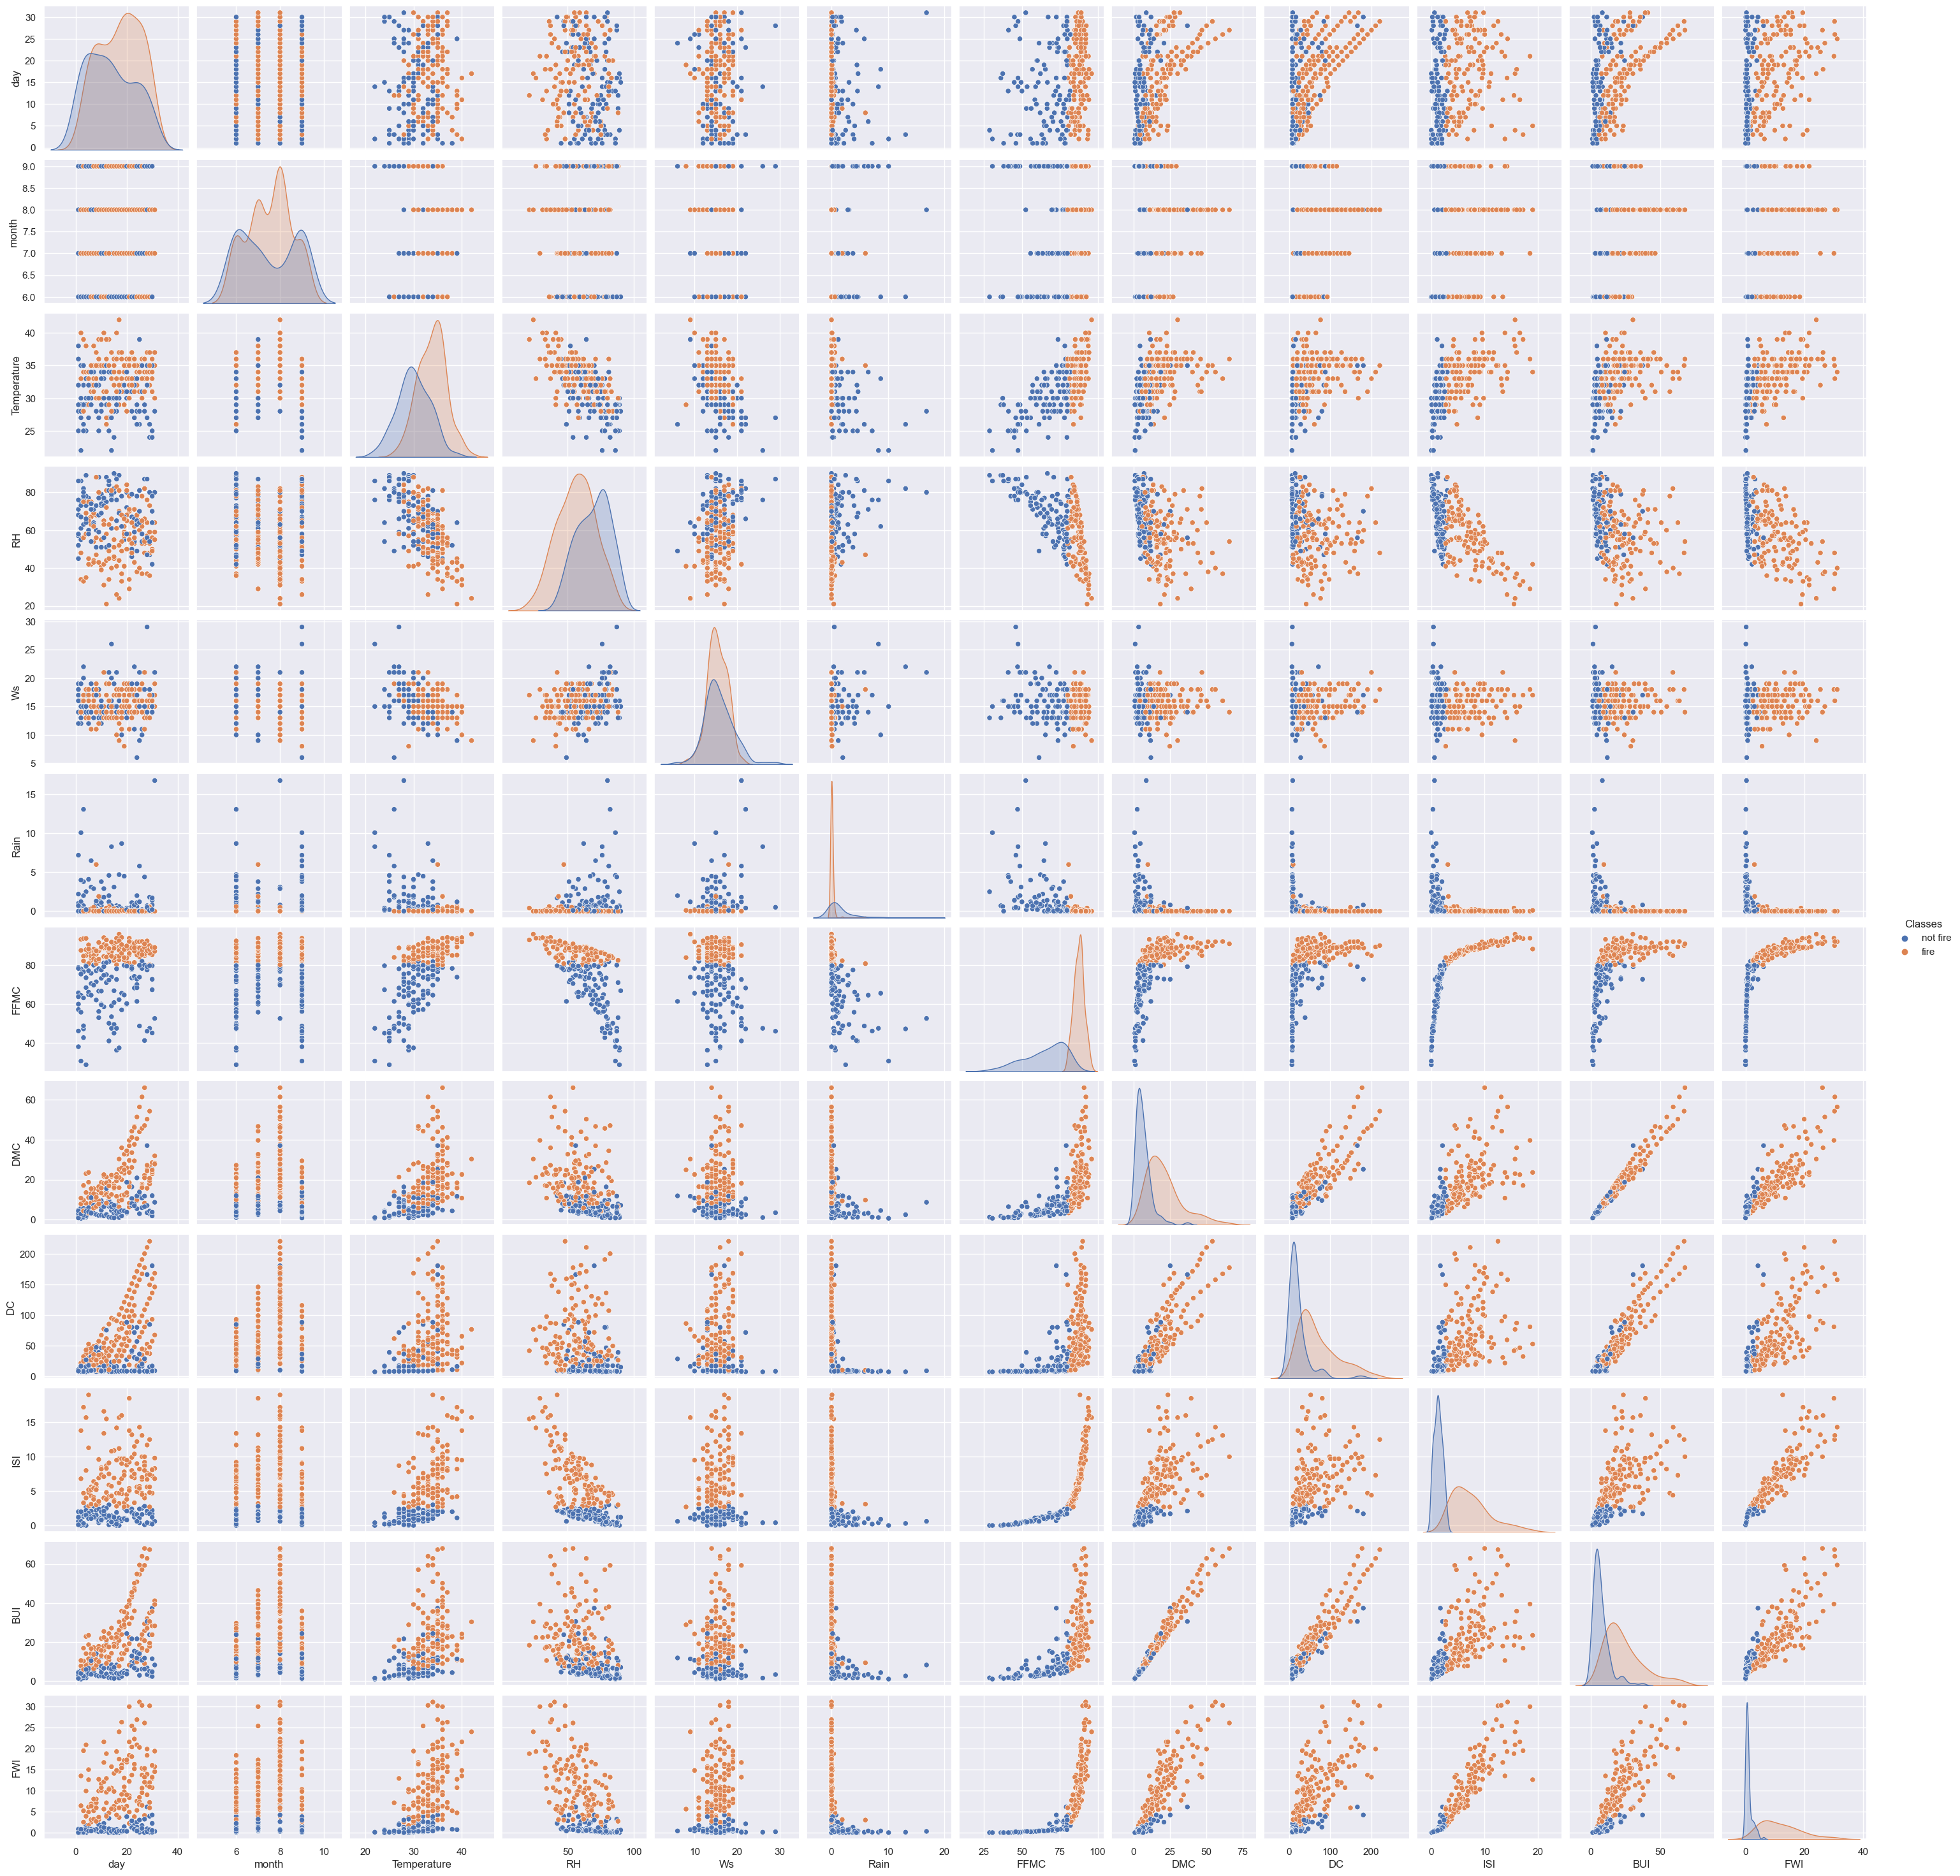

In [126]:
sns.set()
plt.figure(figsize = (30, 30))
sns.pairplot(df1, hue = 'Classes')
plt.show()

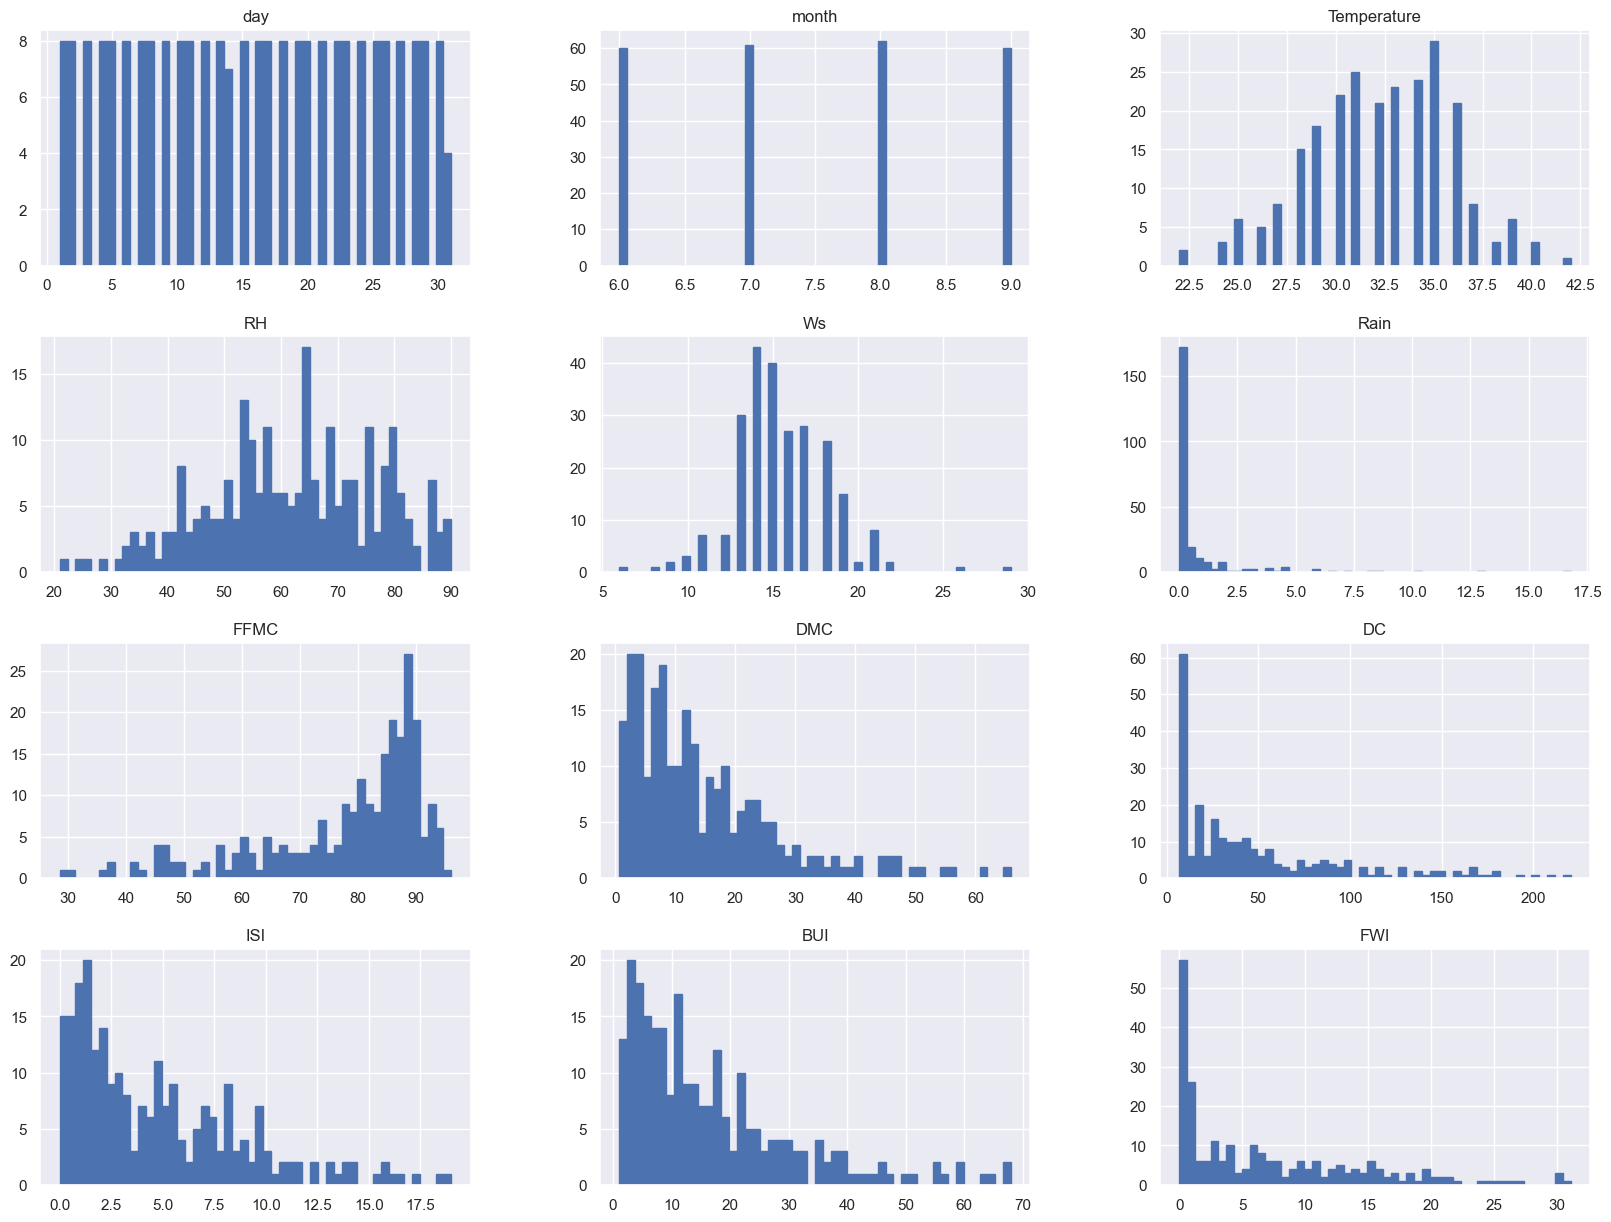

In [127]:
sns.set()
df1.hist(bins=50, figsize=(20,15), ec = 'b')
plt.show()

fire        56.378601
not fire    43.621399
Name: Classes, dtype: float64


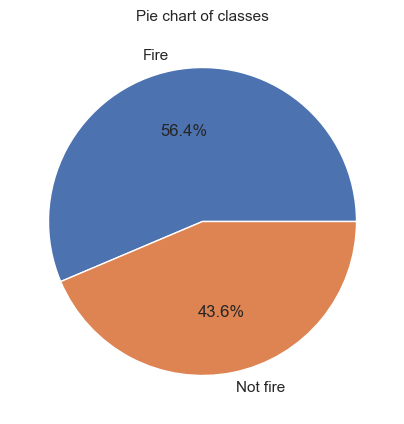

In [166]:
per = df1['Classes'].value_counts(normalize = True) * 100
print(per)

sns.set()
plt.figure(figsize = (5, 5))
plt.title('Pie chart of classes', fontsize = 11)
plt.pie(x= per, labels = ['Fire', 'Not fire'], autopct='%1.1f%%')
plt.show()

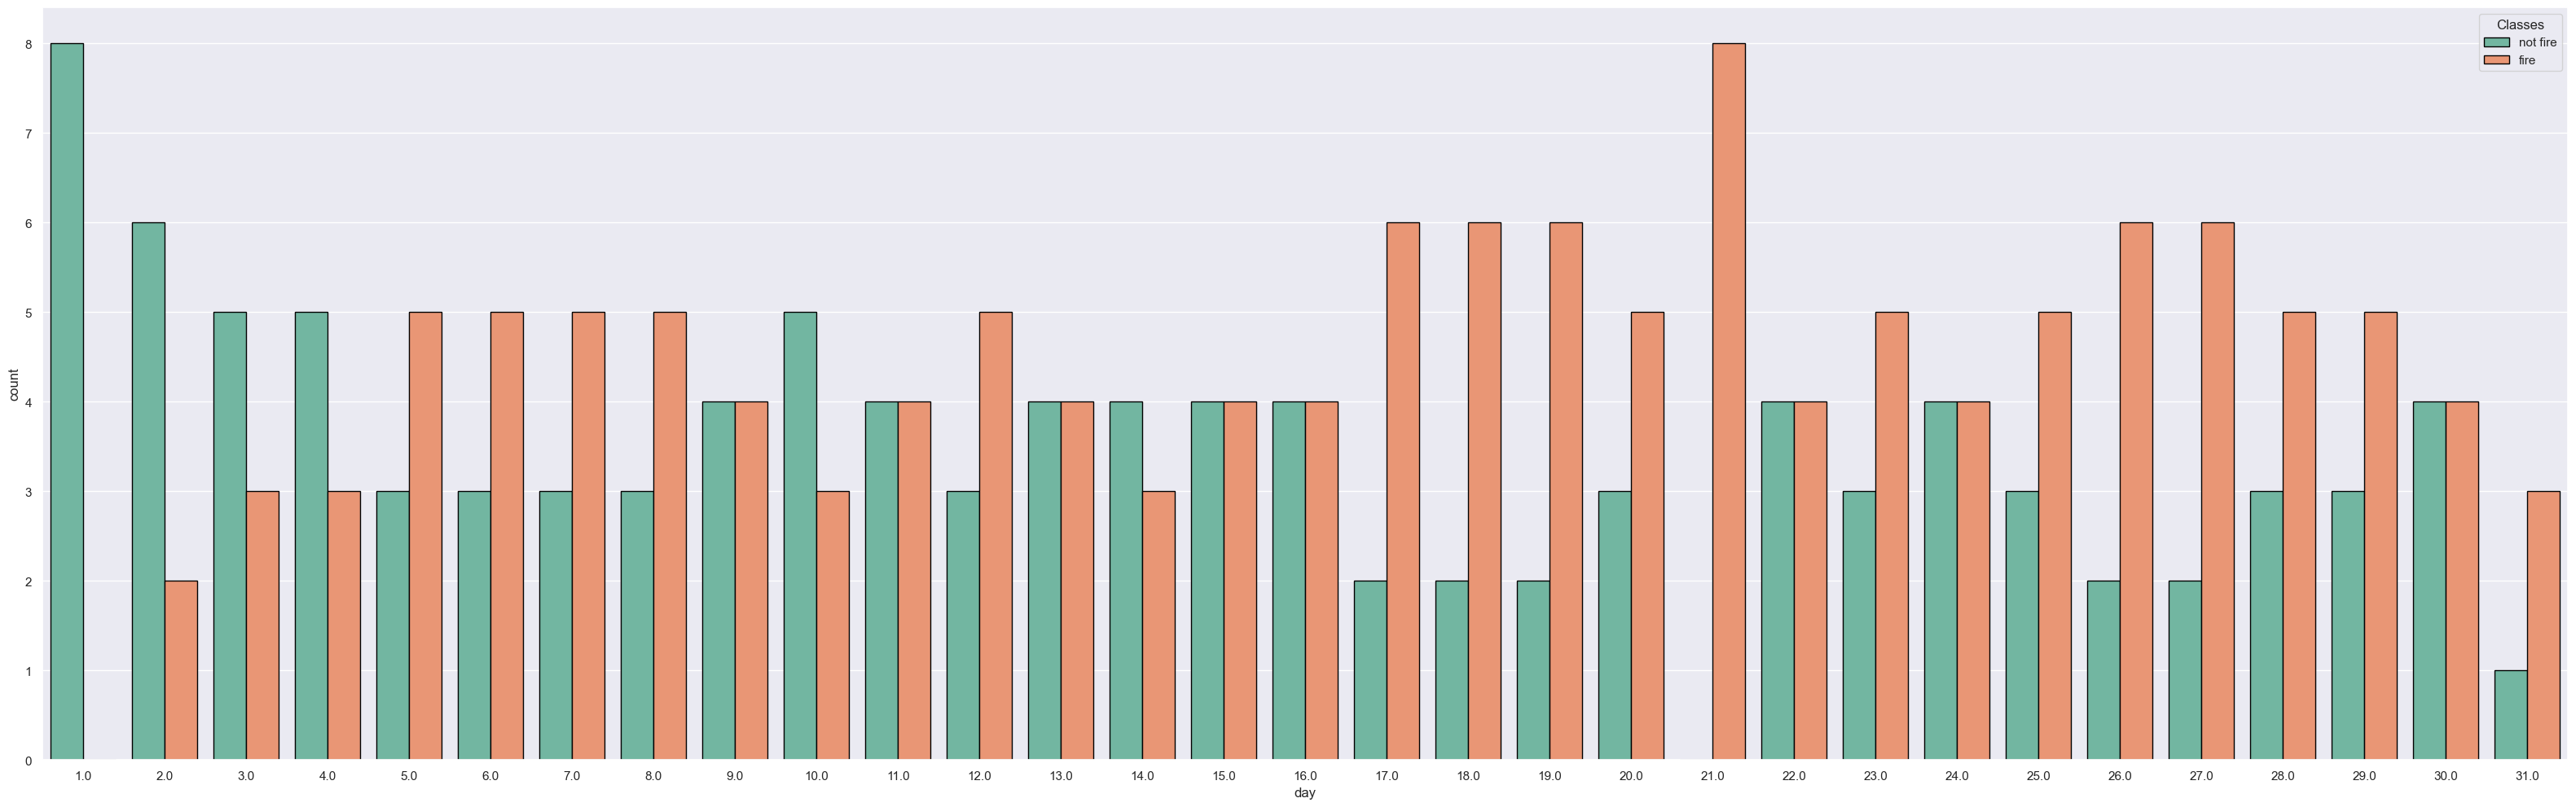

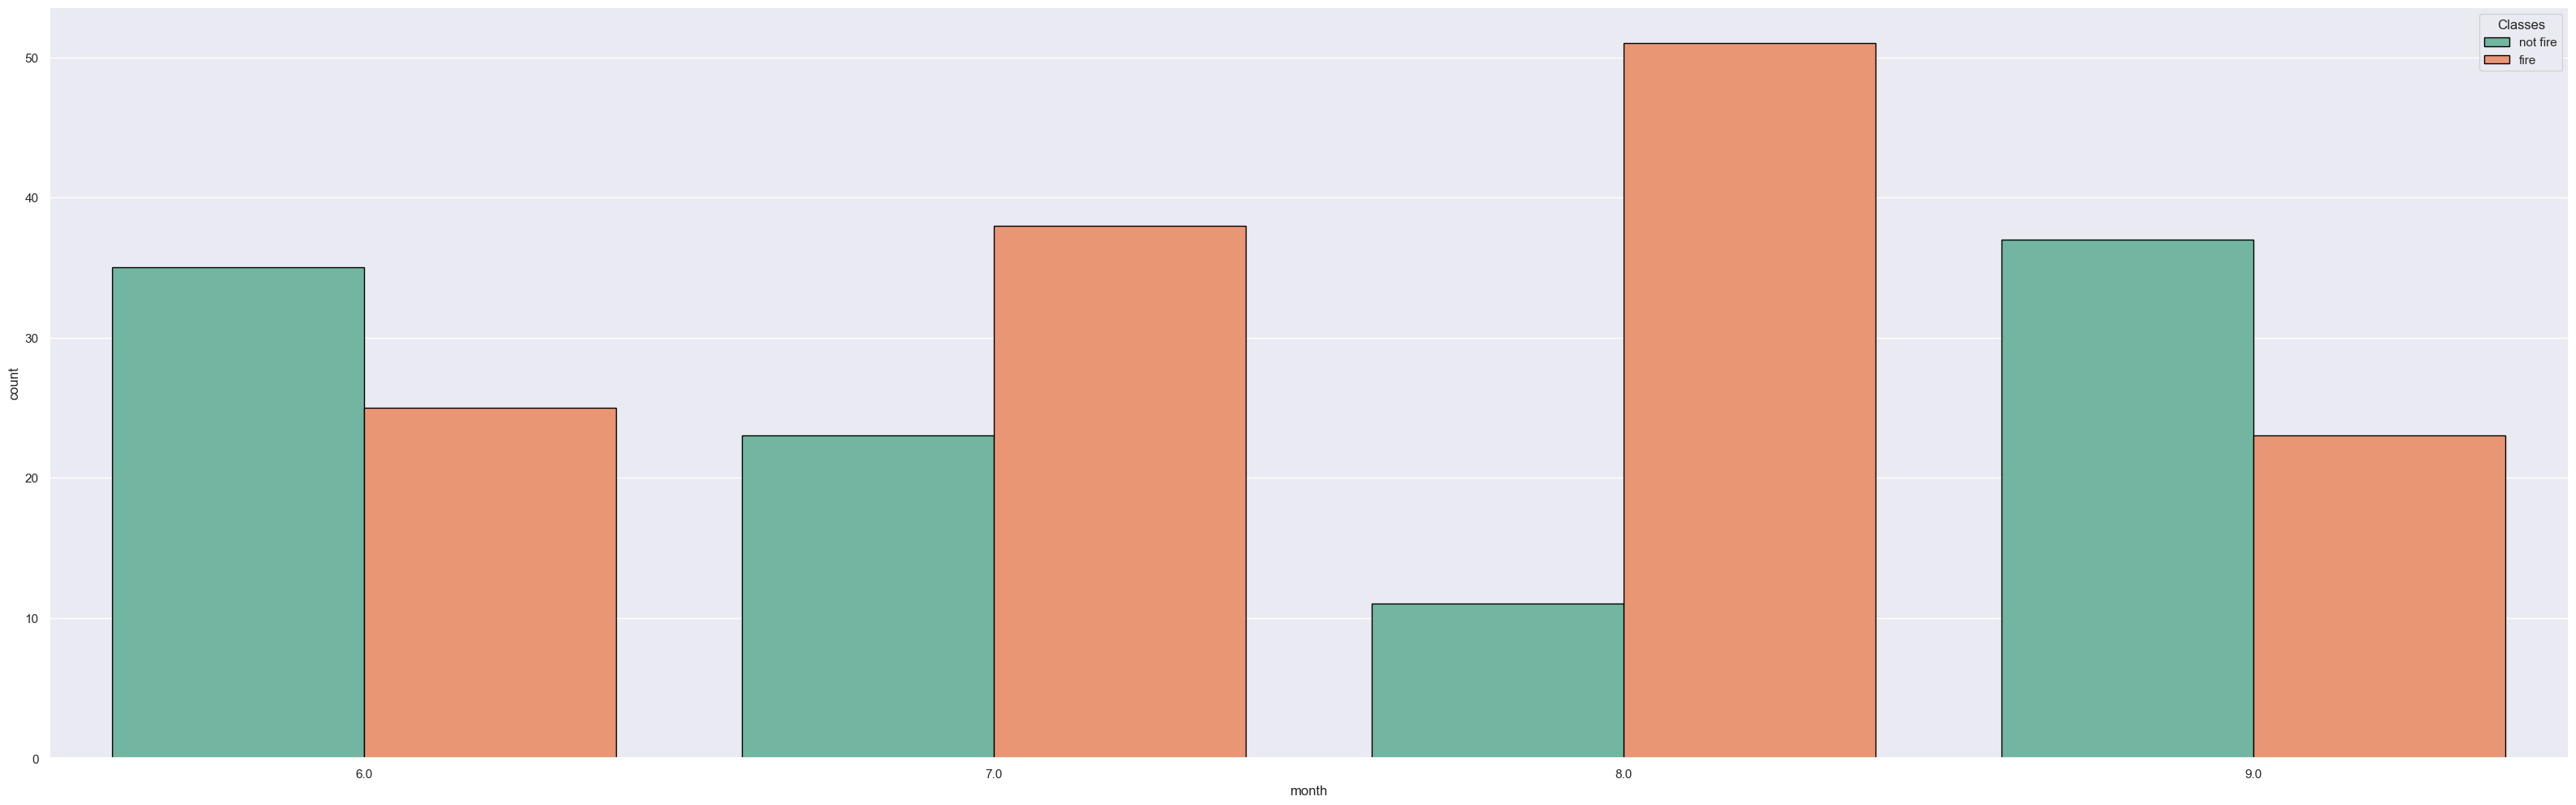

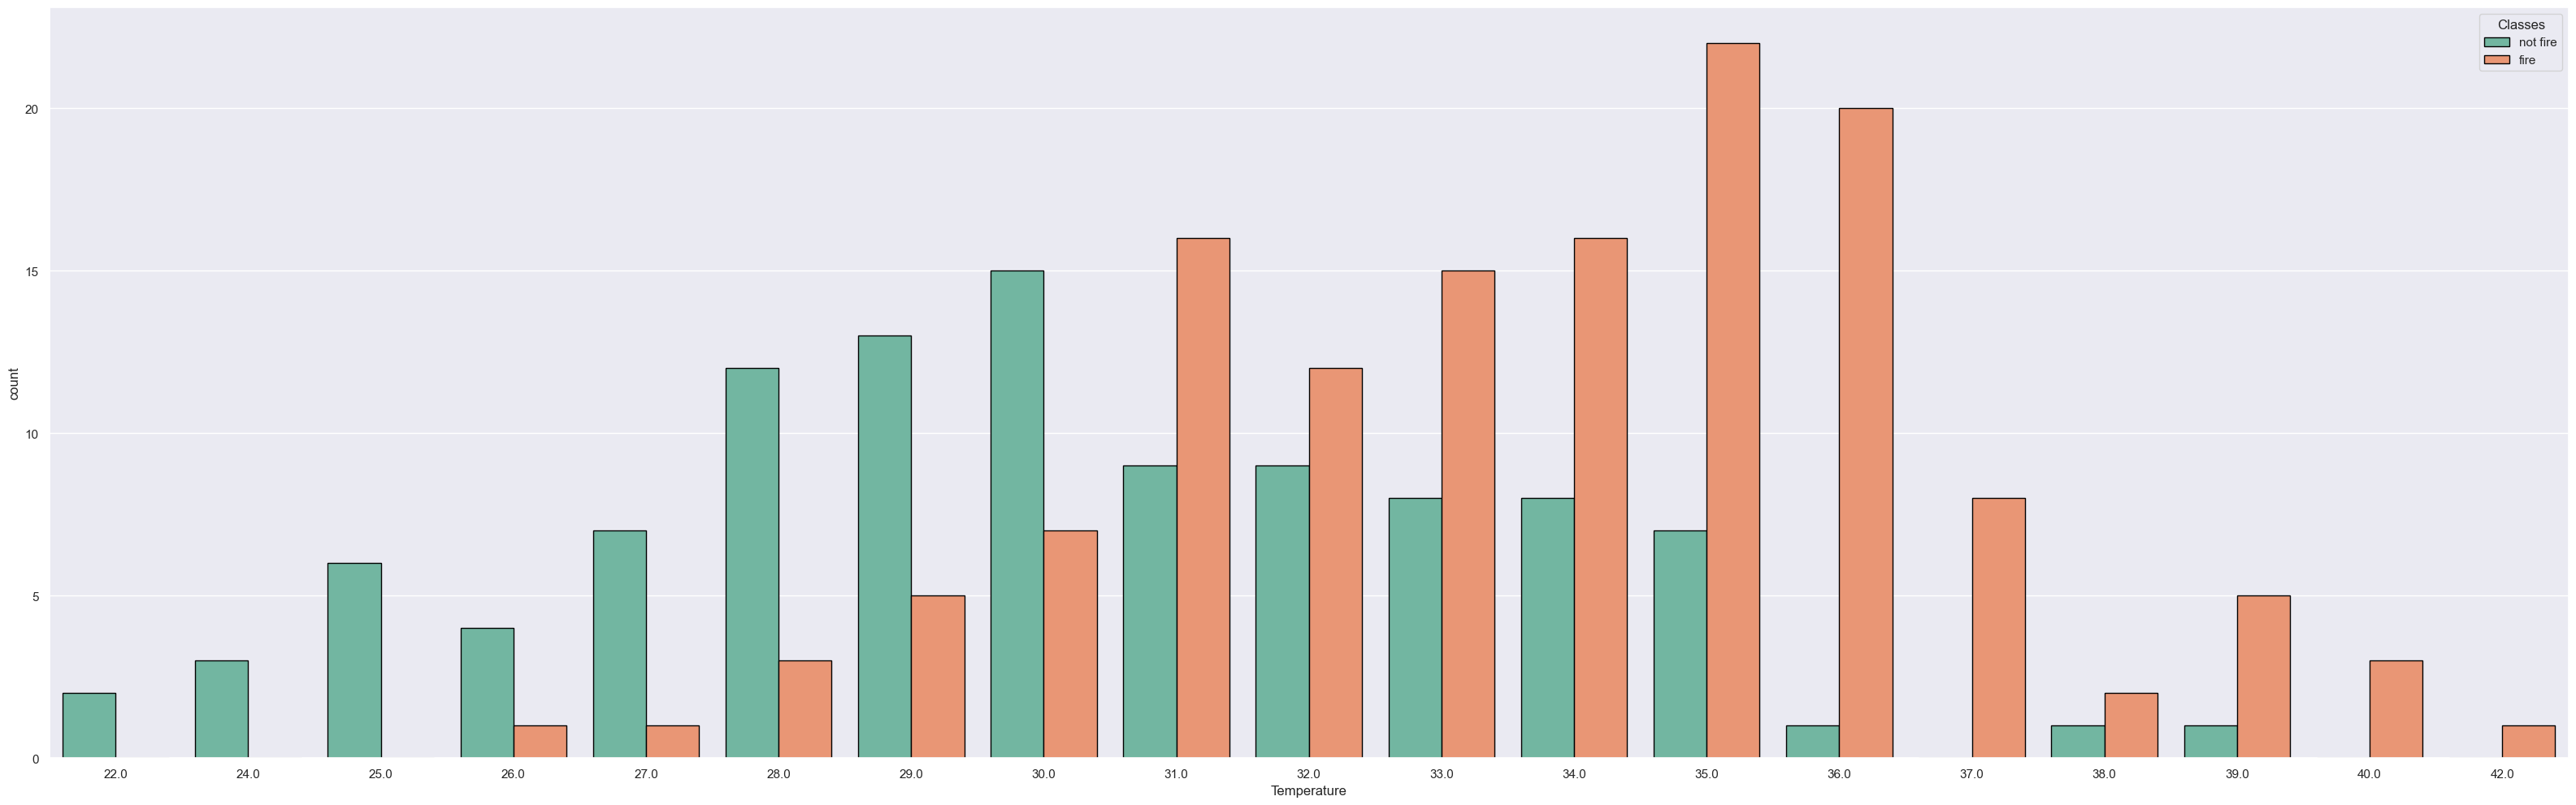

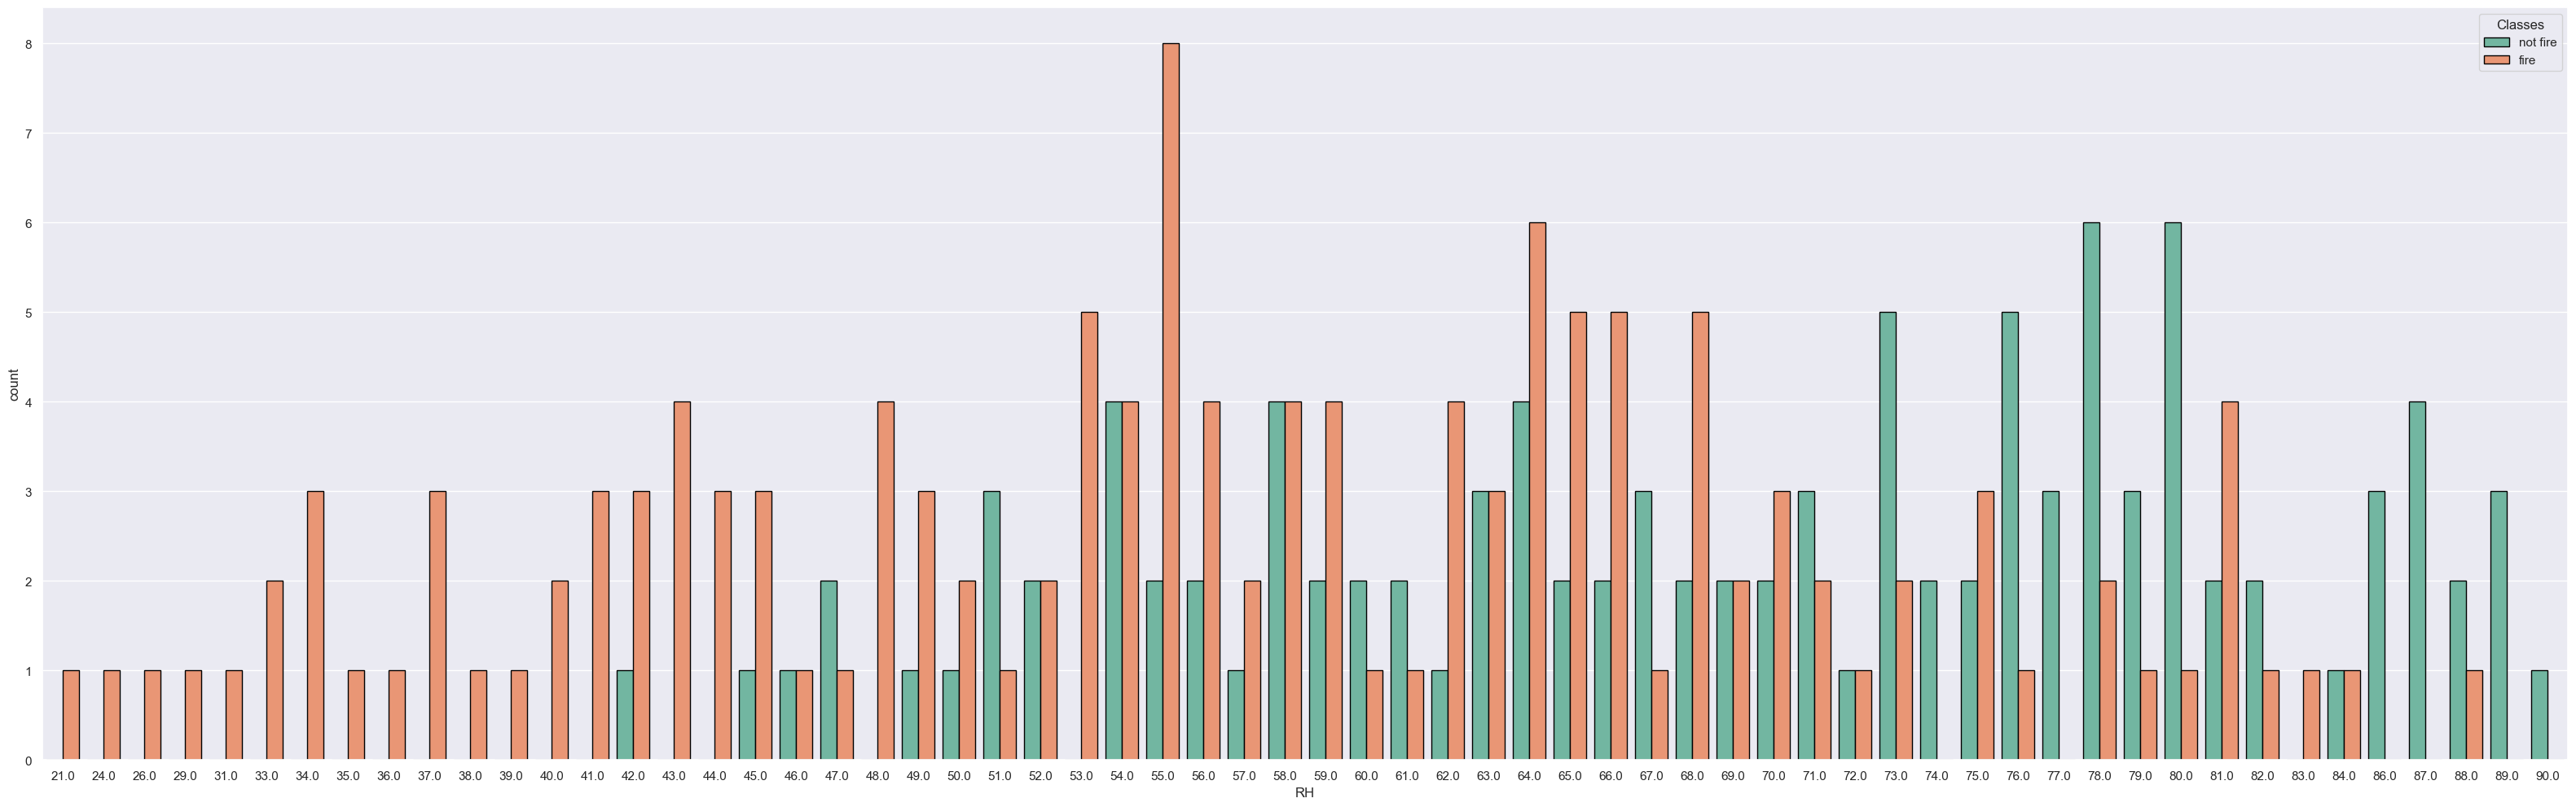

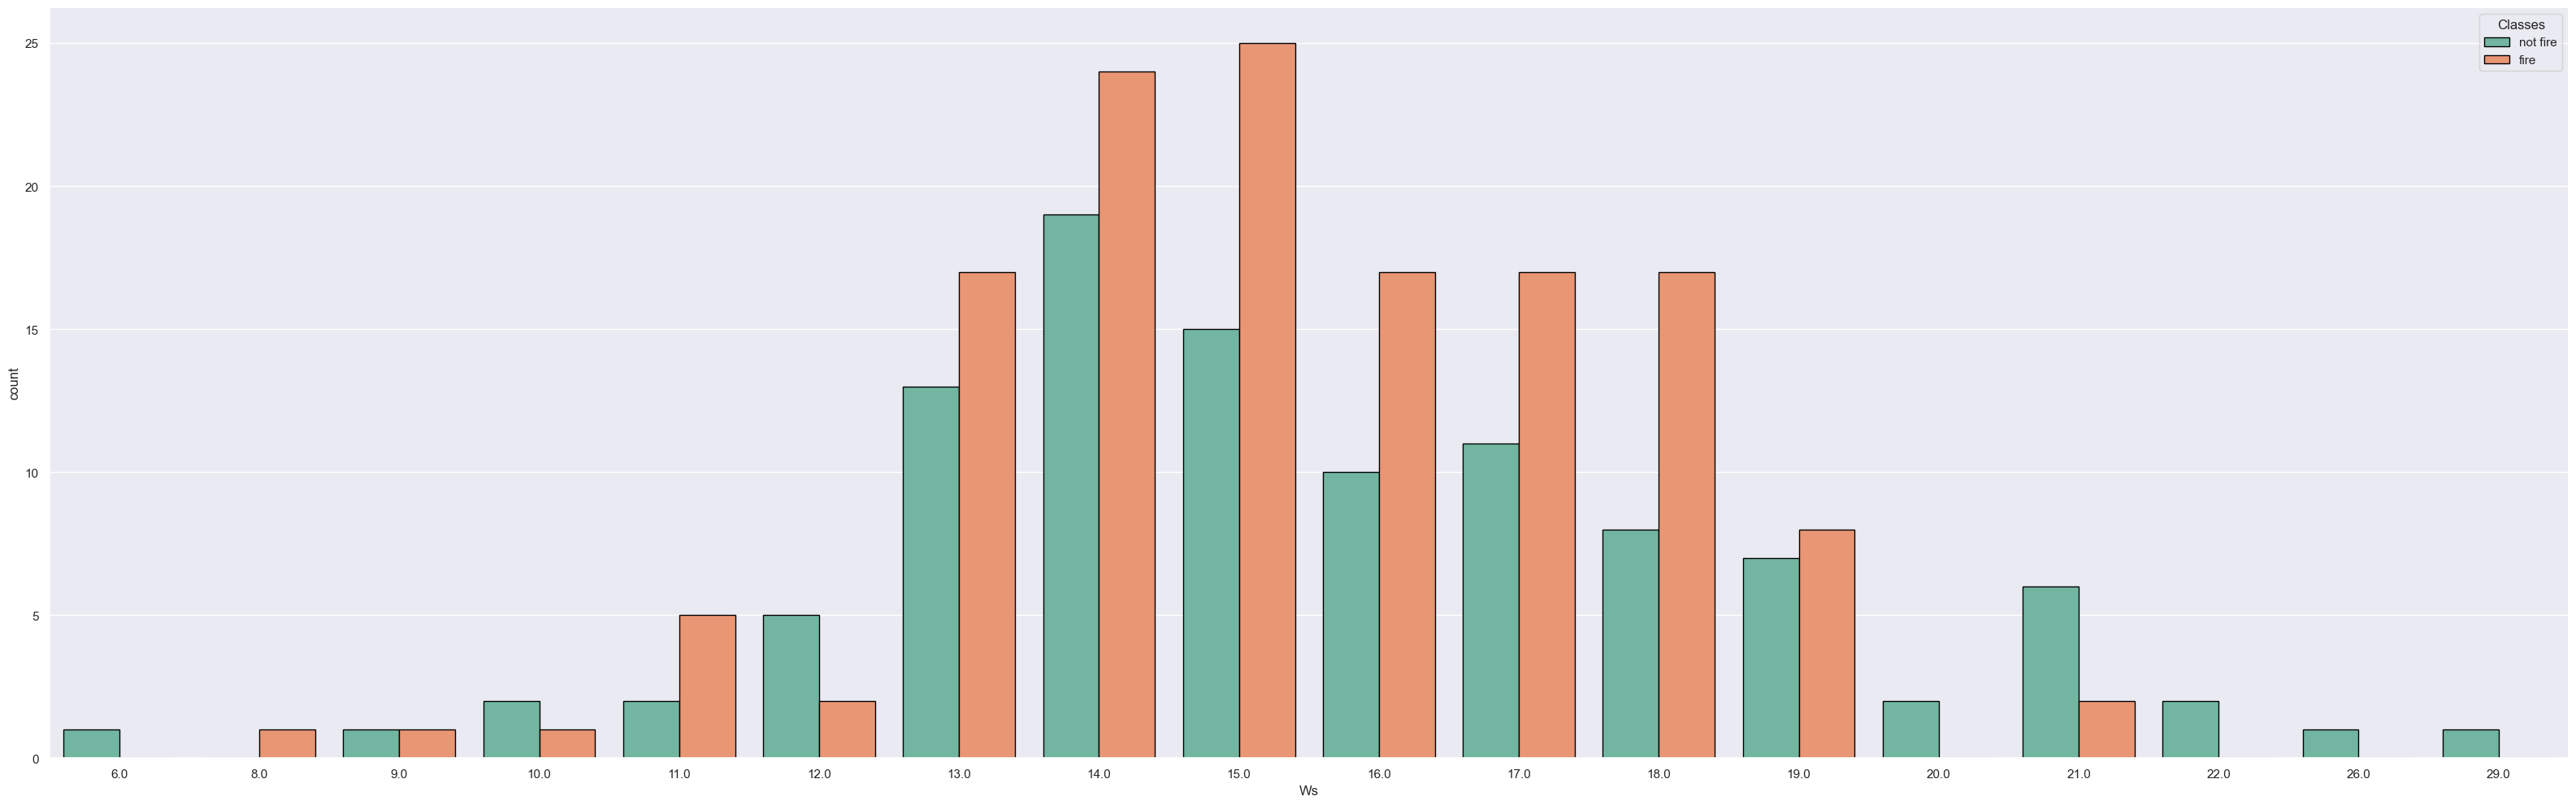

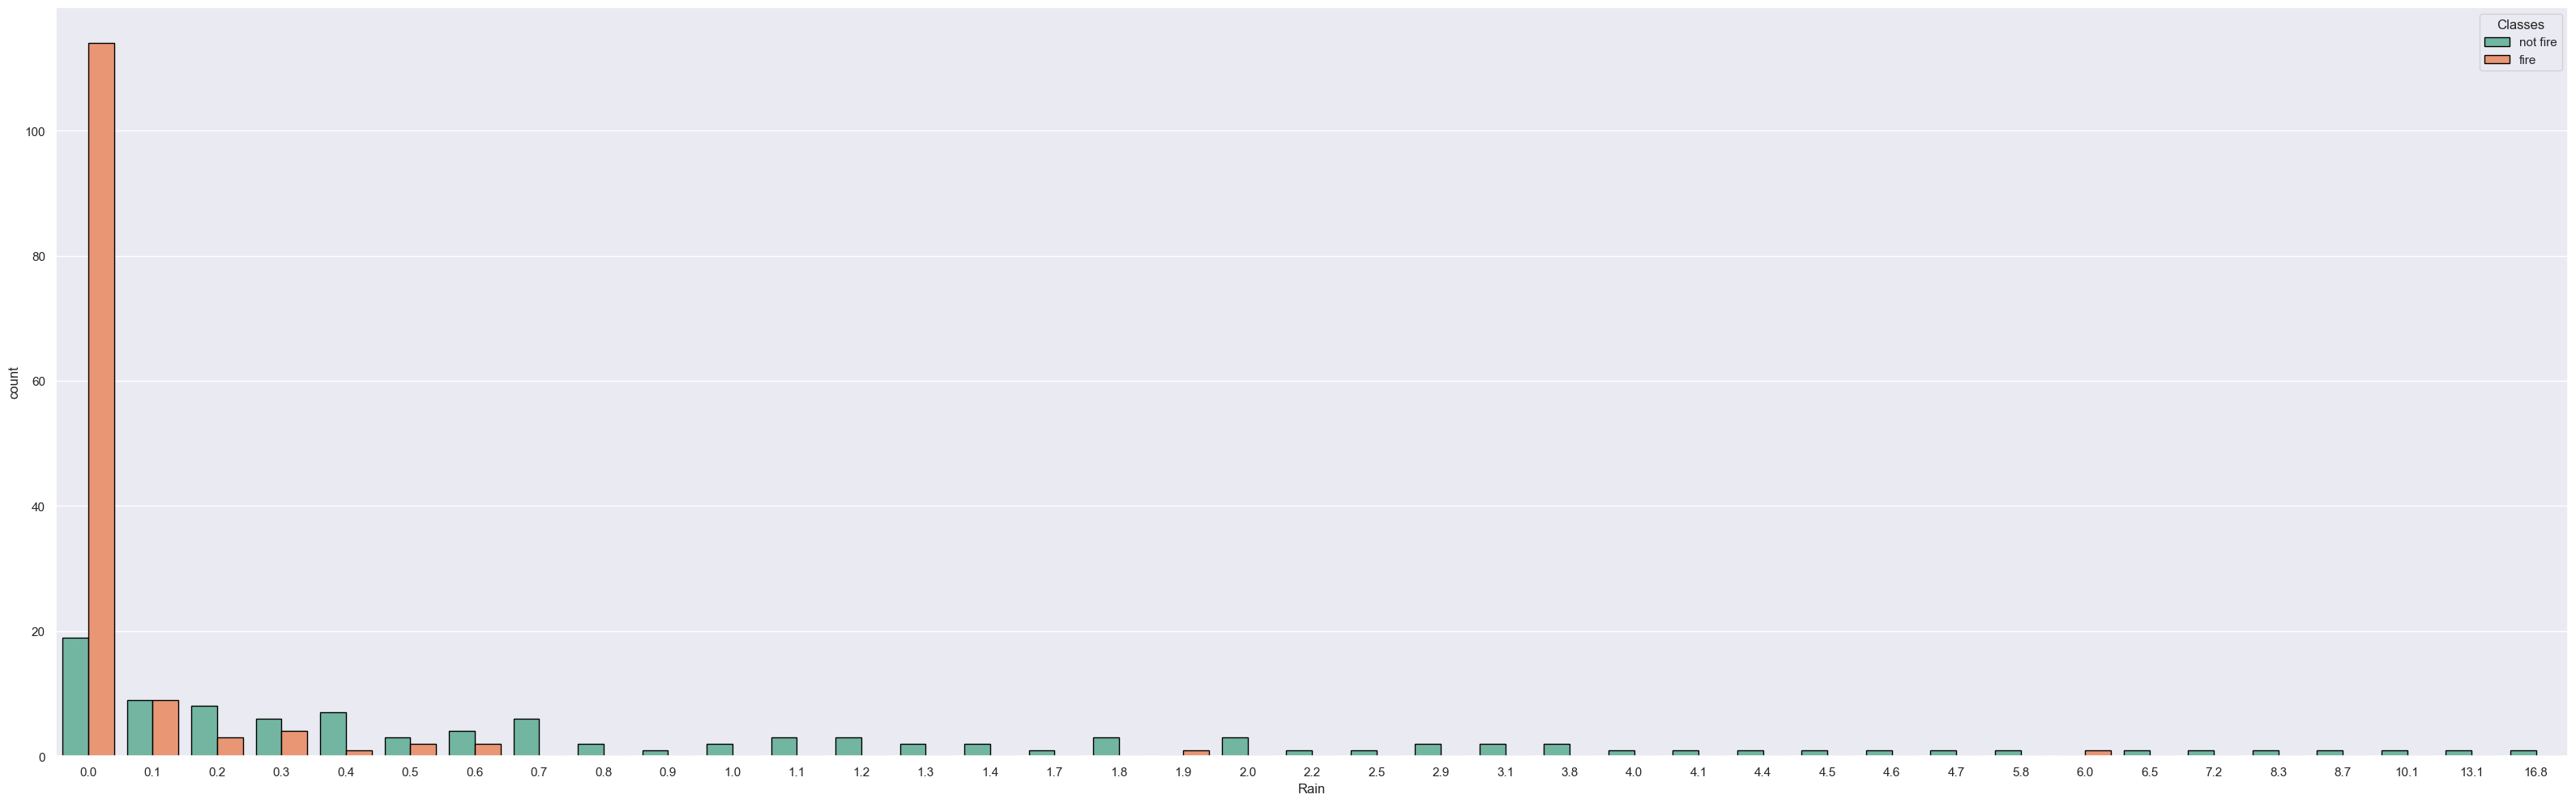

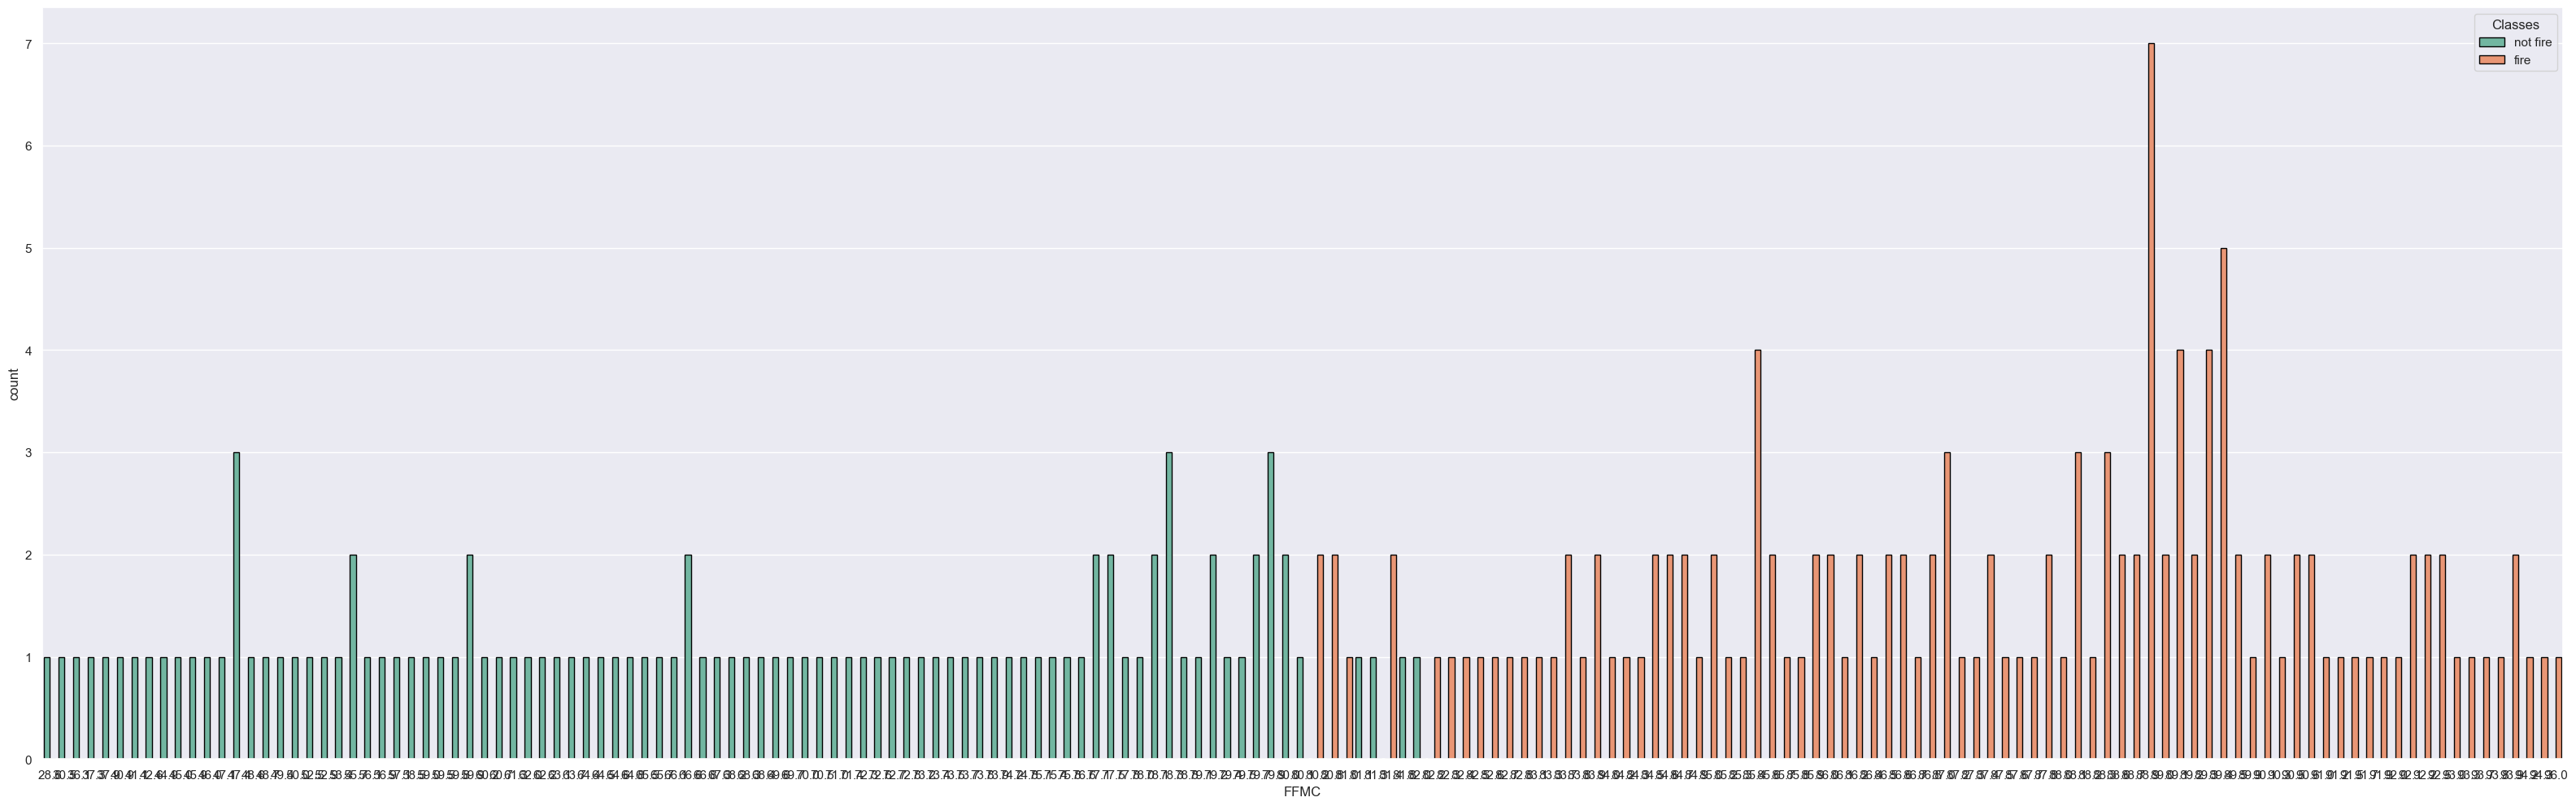

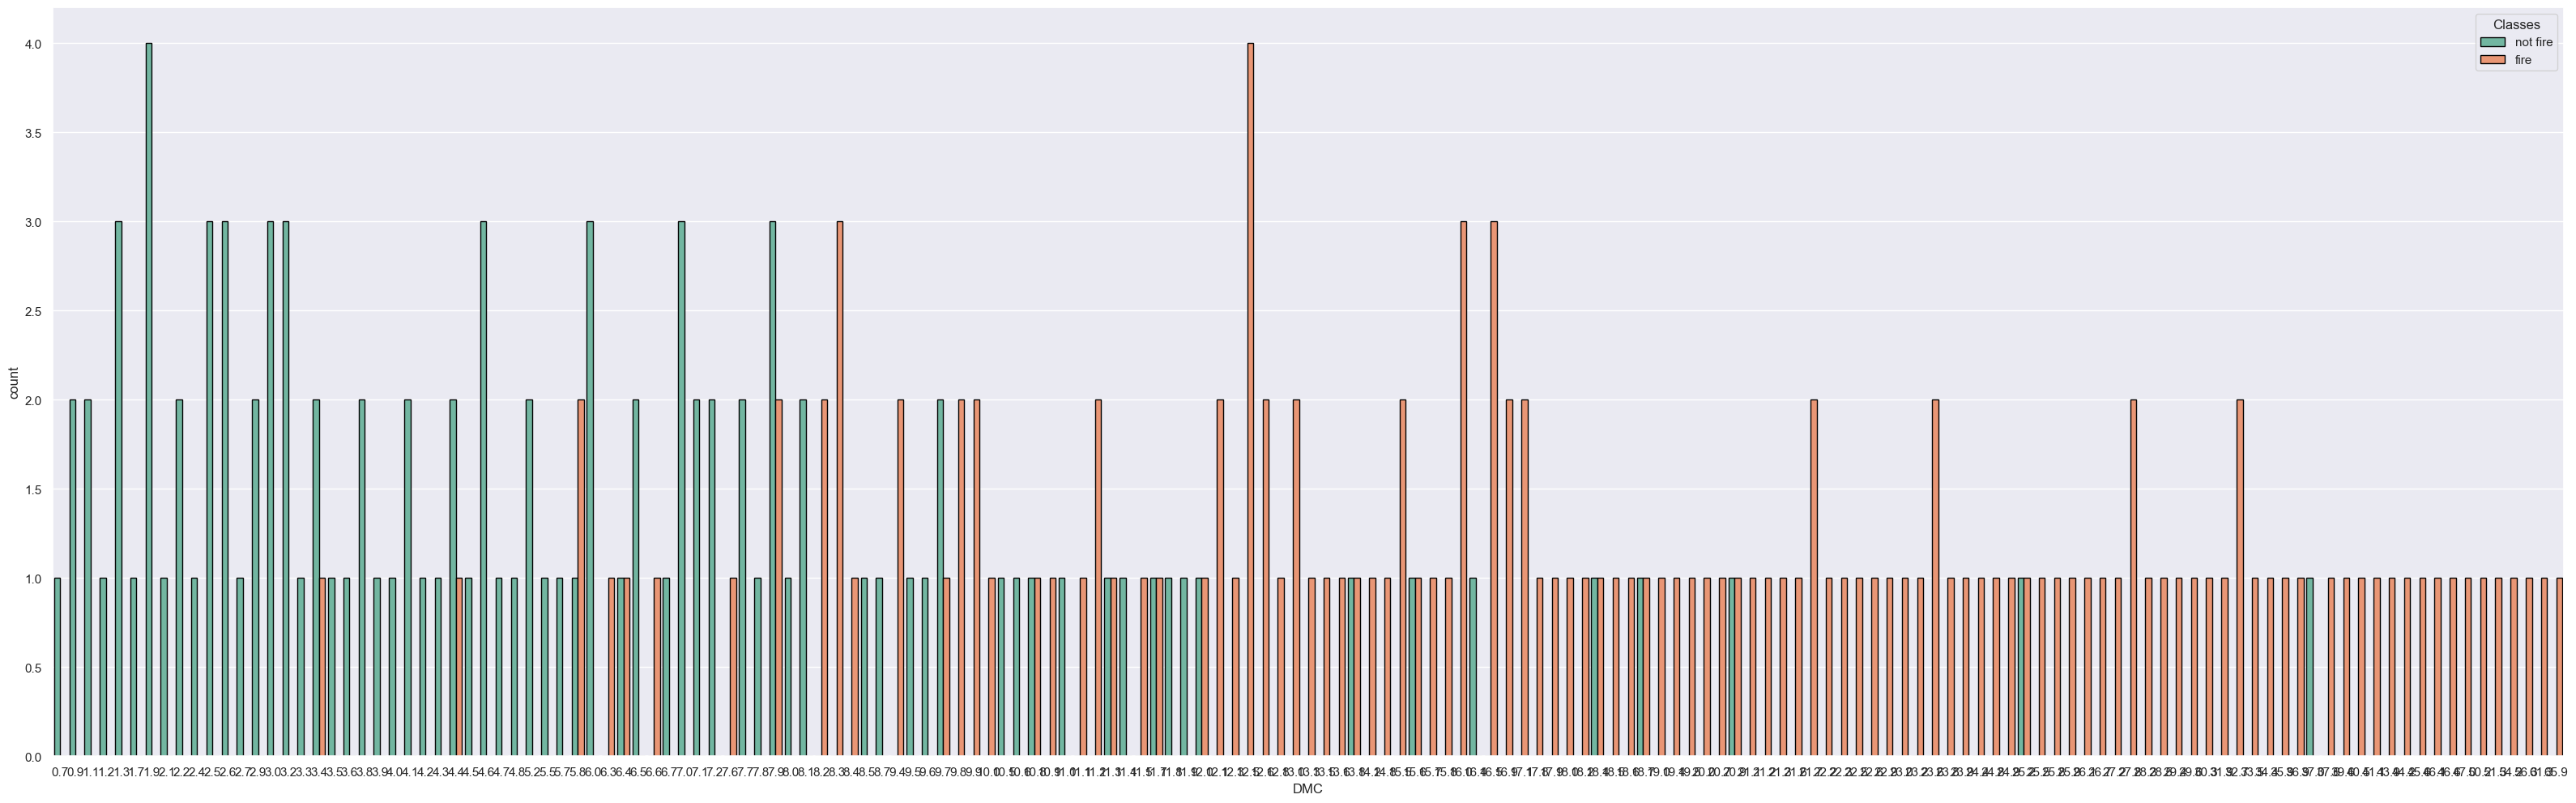

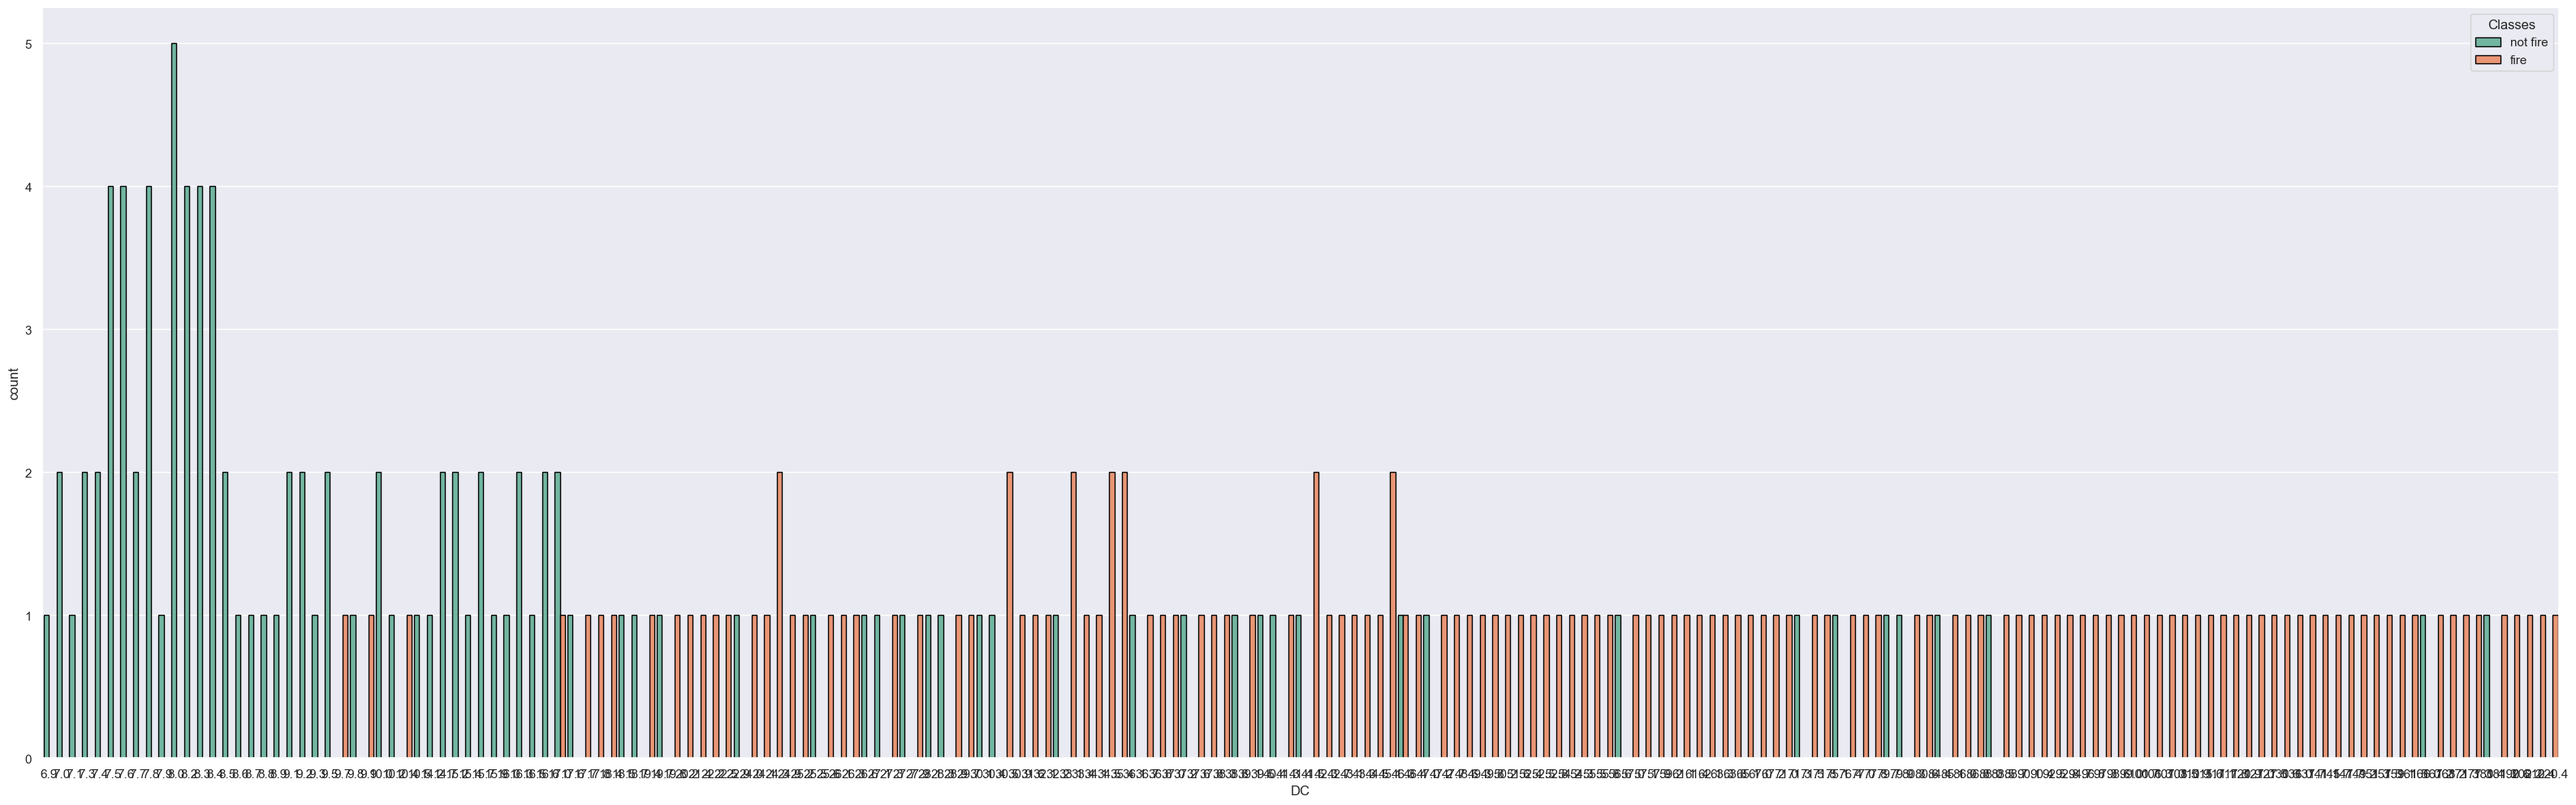

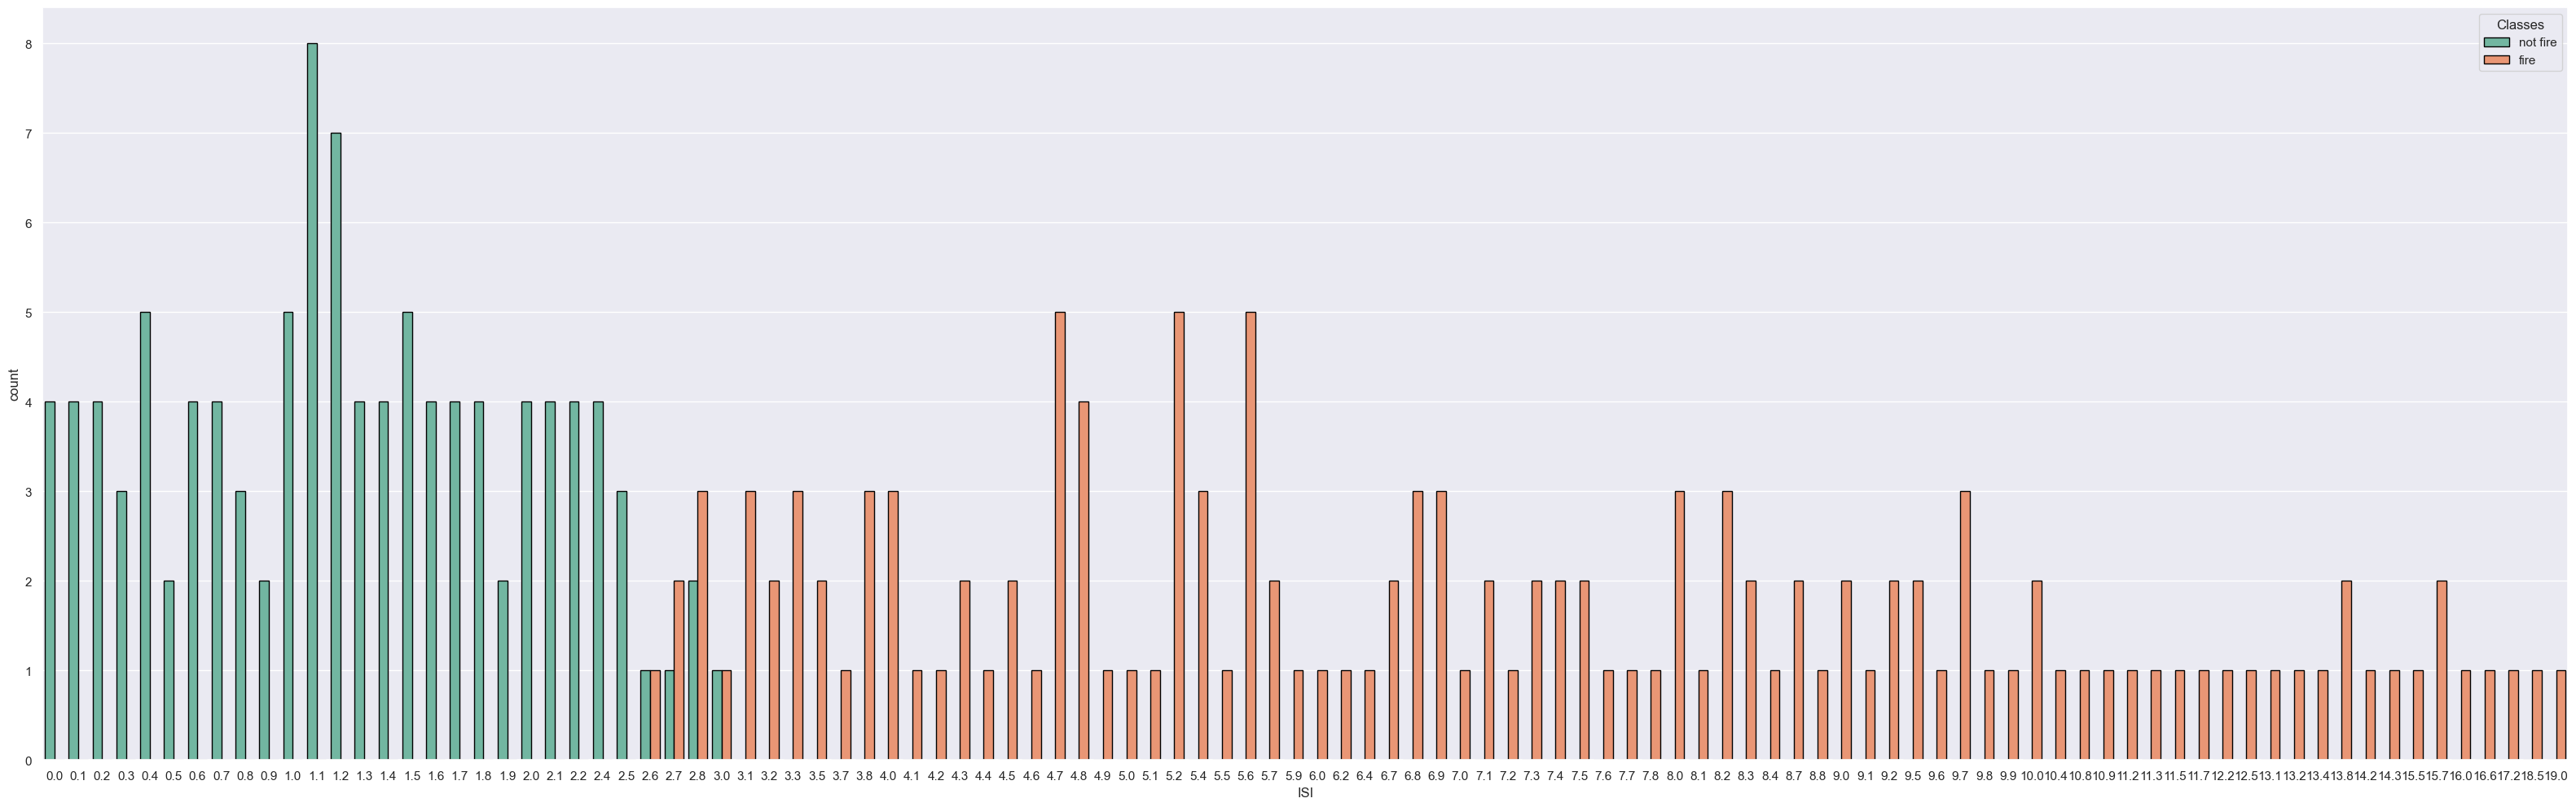

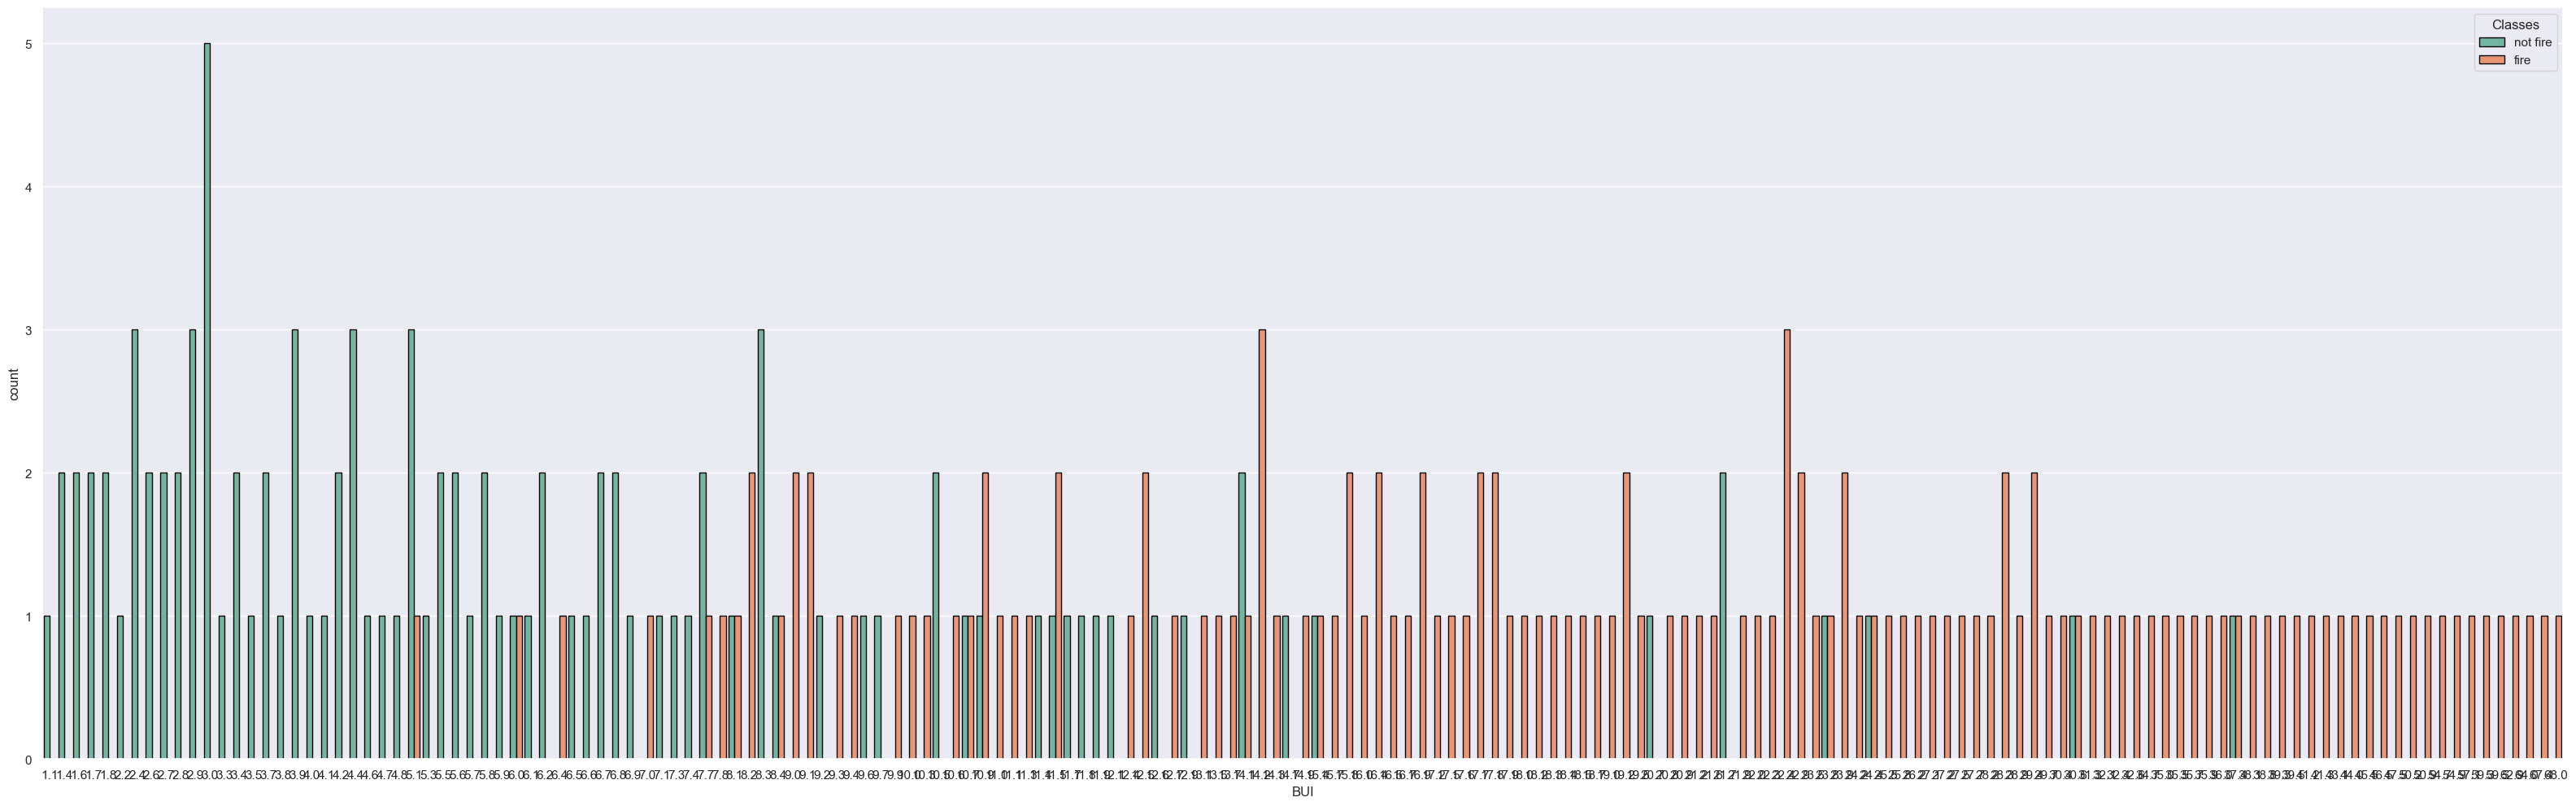

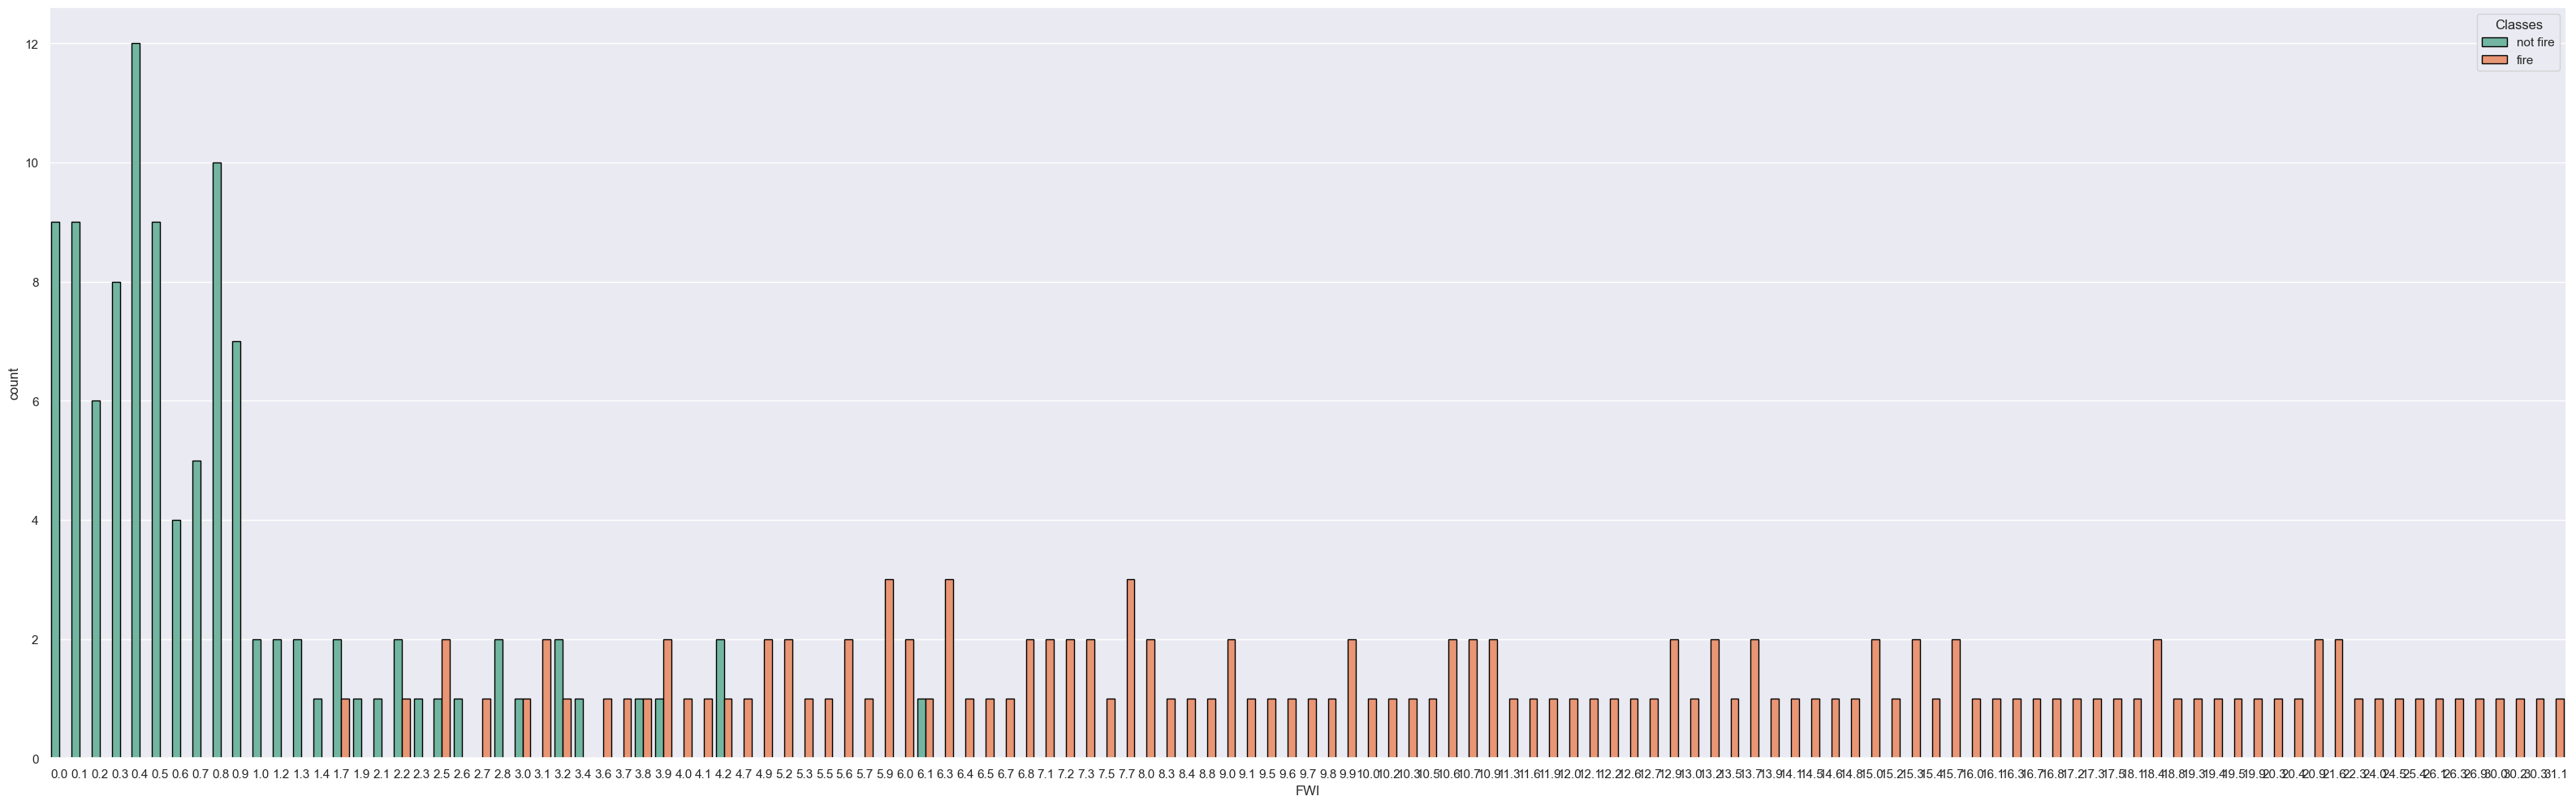

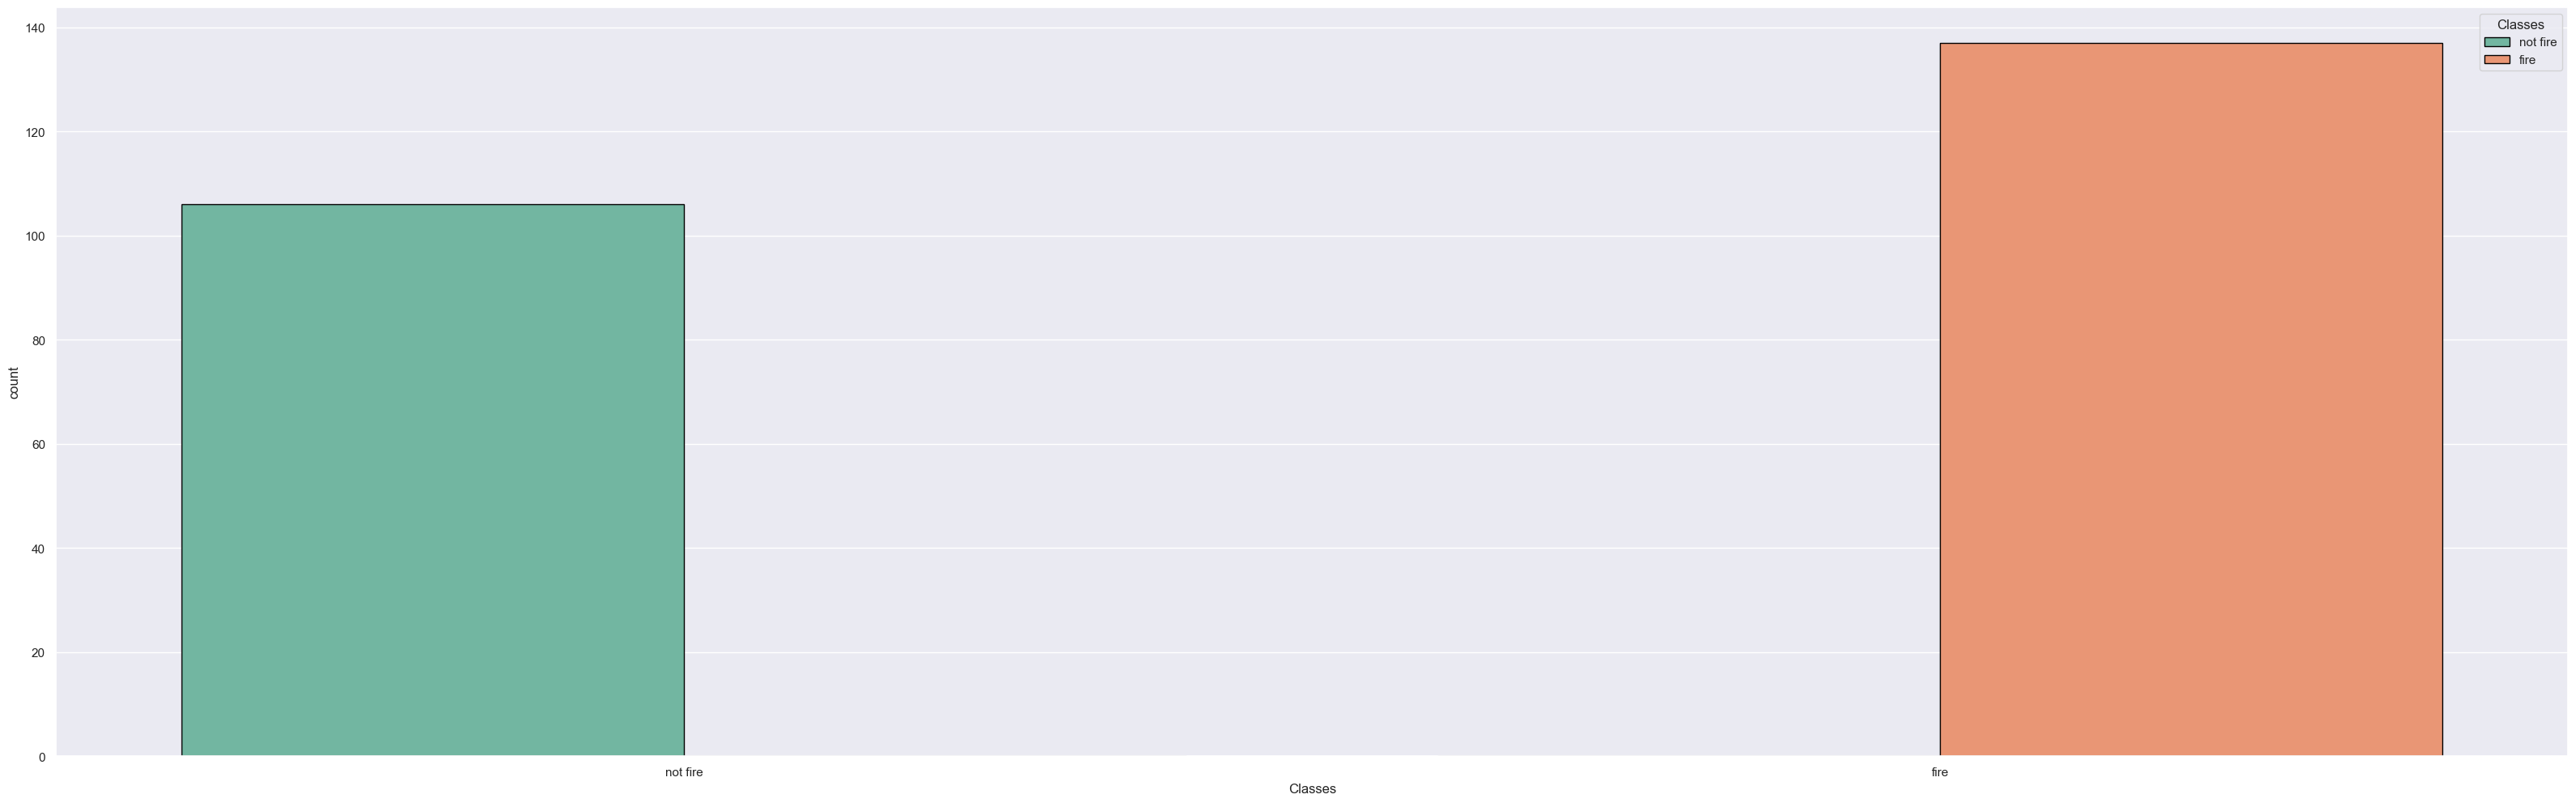

In [188]:
for i in col:
    sns.set()
    plt.figure(figsize = (40, 12))
    sns.countplot(x = i, data = df1, hue = 'Classes', ec = 'black', palette= 'Set2')
    plt.show()